In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [2]:
with ZipFile(r"C:\Users\surya\CampusX\MLOps-Project\nyc-taxi-mlops-project\data\raw\nyc-taxi-trip-duration.zip",'r') as zip_ref:
    zip_ref.extractall(r"..\data\raw")


In [3]:
with ZipFile(r"..\data\raw\train.zip",'r') as file:
    file.extractall(r"..\data\interim")

with ZipFile(r"..\data\raw\test.zip",'r') as file:
    file.extractall(r"..\data\interim")

In [4]:
taxi_df = pd.read_csv(r'..\data\interim\train.csv')
taxi_test = pd.read_csv(r'..\data\interim\test.csv')

In [5]:
print(f"Train Data: {taxi_df.shape}")
print(f"Test Data: {taxi_test.shape}")

Train Data: (1458644, 11)
Test Data: (625134, 9)


## Understanding the data

In [6]:
# Checking null values 
taxi_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
# Checking null values in test data
taxi_test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [8]:
taxi_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 461.8 MB


In [9]:
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Some Geographical Facts 
Latitude and longitude are a pair of numbers that describe a position on a geographic coordinate system. They are measured in decimal degrees and range from __[-90 to 90]__ for latitude and __[-180 to 180]__ for longitude.

In [10]:
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# About the Columns

## **Geographical Coordinates**

- **pickup_longitude**  
  - The minimum value is **-121.9**, and the maximum value is **-61.33**, which are way off the borders of NYC.  
  - The median longitude value is around **-73.9**, which seems fine.  
  - The negative sign is correct since NYC lies west of the prime meridian.  

- **pickup_latitude**  
  - The maximum value of **51.88** is concerning.  
  - The positive sign for all values is expected, as NYC lies above the equator.  

- **dropoff_longitude**  
  - The minimum value is **-121.9**, and the maximum value is **-61.33**, which are way off the borders of NYC.  
  - The median longitude value is around **-73.9**, which seems fine.  
  - The negative sign is correct since NYC lies west of the prime meridian.  
  - Check whether the minimum and maximum values are from the same entry for both pickup and dropoff, as this may indicate a faulty GPS device consistently showing incorrect coordinates.  

- **dropoff_latitude**  
  - The minimum value of **32.181** is concerning.  

## **Target Column (trip_duration)**

- The **mean** trip duration is **959 seconds**, while the **median** is **662 seconds**, indicating a **right-skewed** distribution (**Mean > Median**).  
- This suggests the presence of **outliers** that are skewing the data.  
- The **minimum trip duration** is **1 second**, which likely represents ride cancellations or rejections after the taxi reached the pickup location.  
- The **maximum trip duration** is **980 minutes** (~41 days), which is an extreme outlier and should be handled.  
- The **Q3** (third quartile) is around **17-18 minutes**, indicating that **NYC residents prefer shorter cab trips**.  


In [11]:
taxi_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62488,id1442203,1,2016-04-15 11:47:07,2016-04-15 12:03:21,1,-73.975899,40.791615,-73.970116,40.767998,N,974
979948,id3183167,2,2016-05-15 17:55:23,2016-05-15 18:07:02,5,-73.973633,40.750660,-73.982979,40.755020,N,699
1110135,id2247388,1,2016-06-08 22:57:24,2016-06-08 23:12:31,1,-73.973778,40.764854,-73.984810,40.745575,N,907
410489,id0864889,2,2016-02-02 06:28:26,2016-02-02 06:37:24,6,-73.996017,40.732140,-73.970688,40.756210,N,538
386328,id1706302,1,2016-01-20 18:35:17,2016-01-20 18:38:54,1,-73.979164,40.772057,-73.964645,40.765648,N,217
44998,id0526840,2,2016-03-25 20:19:15,2016-03-25 20:42:59,5,-73.972954,40.759808,-73.989464,40.727798,N,1424
1125931,id1927611,2,2016-05-01 11:35:02,2016-05-01 11:42:08,1,-73.970375,40.753159,-73.985886,40.762161,N,426
624182,id0135662,1,2016-06-03 13:41:12,2016-06-03 13:50:46,1,-73.980186,40.751495,-73.973007,40.743519,Y,574
172233,id1917382,1,2016-05-31 09:28:06,2016-05-31 09:36:15,1,-73.986183,40.767456,-73.990723,40.757687,N,489
1373316,id0470197,1,2016-01-21 07:40:55,2016-01-21 07:52:23,1,-73.968307,40.786812,-73.954636,40.780537,N,688


### About the Columns 
1. id - Starts with id and then a bunch of random numbers(7 to be exact).
2. vendor_id - Integer column and categorical.
3. pickup_datetime - Fmt YYYY-MM-DD HH:MM:SS
4. dropoff_datetime - Fmt YYYY-MM-DD HH:MM:SS
5. passenger_count - Integer column
6. pickup_longitude/latitude - longitude is negative and latitude is positive(above Tropic of Cancer).
7. dropoff_longitude/latitude - longitude is negative and latitude is positive(above Tropic of Cancer).
8. store_and_fwd_flagstore_and_fwd_flag - String categorical - Has to be encoded.
9. trip_duration - in seconds



In [12]:
# Checking duplicates in the data 
taxi_df.duplicated().sum()

np.int64(0)

In [13]:
cols_to_describe_num = taxi_df.columns[[5,6,7,8,10]]
cols_to_describe_cat = [col for col in taxi_df.columns if col not in cols_to_describe_num]
cols_to_describe_cat = np.array(cols_to_describe_cat)[[1,4,5]]

In [14]:
print(f"Categorical Columns: {cols_to_describe_cat}")
print(f"Numerical Columns: {cols_to_describe_num}")

Categorical Columns: ['vendor_id' 'passenger_count' 'store_and_fwd_flag']
Numerical Columns: Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration'],
      dtype='object')


In [15]:
taxi_df.duplicated(subset=(taxi_df.columns[[1]].to_list() + taxi_df.columns[4:].to_list())).sum()


np.int64(9)

In [16]:
for col in cols_to_describe_cat:
    print(f"The uinque values in the {col} are ----> {np.sort(taxi_df[col].unique())}")
    print(taxi_df[col].value_counts())
    print('*'*100,end='\n')

The uinque values in the vendor_id are ----> [1 2]
vendor_id
2    780302
1    678342
Name: count, dtype: int64
****************************************************************************************************
The uinque values in the passenger_count are ----> [0 1 2 3 4 5 6 7 8 9]
passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64
****************************************************************************************************
The uinque values in the store_and_fwd_flag are ----> ['N' 'Y']
store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64
****************************************************************************************************


**Things to investigate:**

1. What does it mean to have 0 passengers in the cab.
2. Remove the passengers 7 to 9 from the data as they are only 5 data points in our training data.
3. It is hard to imagine 7, 8 or 9 passengers in a single cab. Maybe it can be a luxury car or a mini van sort of taxi.

### Exploratory Data Analysis (EDA)

In [17]:
# Colums in the data 
taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

### Target Colum -> Trip Duration

__Target column is in seconds__

In [18]:
# Statistical Description of target column
target_column = 'trip_duration'

taxi_df[target_column].describe().reset_index()

,index,trip_duration
0,count,1.458644e+06
1,mean,9.594923e+02
2,std,5.237432e+03
3,min,1.000000e+00
4,25%,3.970000e+02
5,50%,6.620000e+02
6,75%,1.075000e+03
7,max,3.526282e+06


In [19]:
# number of trips in the target column that have durations less than 1 minute or 60 seconds
taxi_df[target_column].loc[taxi_df[target_column]<=60].size

8777

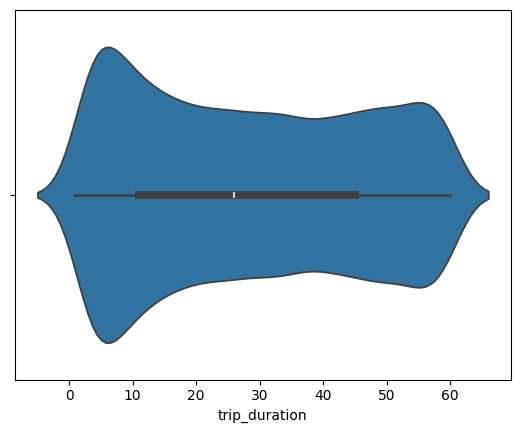

In [20]:
# distribution of target column of trips less than a minute
sns.violinplot(x=taxi_df[target_column].loc[taxi_df[target_column]<=60])
plt.show()

In [21]:
# trip durations equal to 1 sec
taxi_df.loc[taxi_df[target_column] == 1]


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
35196,id2536510,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.940384,40.786423,-73.940300,40.786373,N,1
207497,id1520236,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.819893,40.740822,-73.819885,40.740822,N,1
269418,id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1
279493,id1491861,1,2016-04-24 11:35:40,2016-04-24 11:35:41,1,-73.841423,40.695278,-73.841423,40.695274,N,1
285635,id0075470,1,2016-03-07 16:12:28,2016-03-07 16:12:29,1,-73.980690,40.744419,-73.980690,40.744419,N,1
311745,id2959956,1,2016-02-25 04:26:50,2016-02-25 04:26:51,1,-73.806152,40.660206,-73.806267,40.660049,N,1
346102,id2375785,1,2016-01-15 23:57:18,2016-01-15 23:57:19,1,-73.985825,40.755760,-73.985901,40.755829,N,1
346959,id1171557,1,2016-02-10 16:33:43,2016-02-10 16:33:44,1,-73.776512,40.646454,-73.776512,40.646454,N,1
404610,id3686648,1,2016-01-29 11:18:55,2016-01-29 11:18:56,1,-73.971954,40.750137,-73.971985,40.750130,N,1
451396,id2836747,1,2016-01-26 10:47:22,2016-01-26 10:47:23,1,-74.001610,40.737450,-74.001610,40.737450,N,1


In [22]:
# Target column in minutes 
target_col_minutes = taxi_df[target_column]/60
target_col_minutes.describe().reset_index()

,index,trip_duration
0,count,1.458644e+06
1,mean,1.599154e+01
2,std,8.729053e+01
3,min,1.666667e-02
4,25%,6.616667e+00
5,50%,1.103333e+01
6,75%,1.791667e+01
7,max,5.877137e+04


**Key Points:**

1. The mean ride time is around 16 min.
2. The median is 11 min. Mean is greater than Median means that the variable is right skewed.
3. 75th percentile value is 18 min.
4. The min value is 0 to 1 sec.
5. The max is 41 days or 5877 min.

<Axes: xlabel='trip_duration', ylabel='Density'>

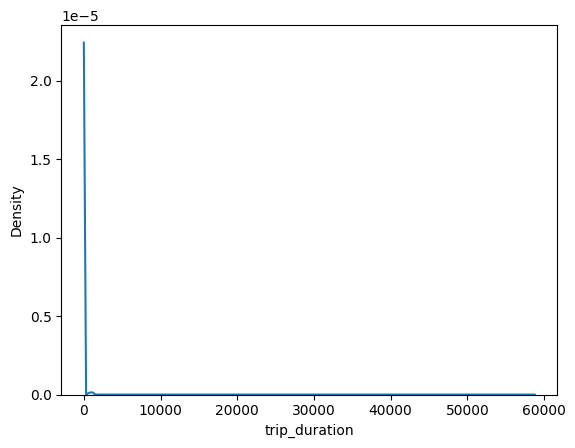

In [23]:
sns.kdeplot(target_col_minutes)

<Axes: ylabel='trip_duration'>

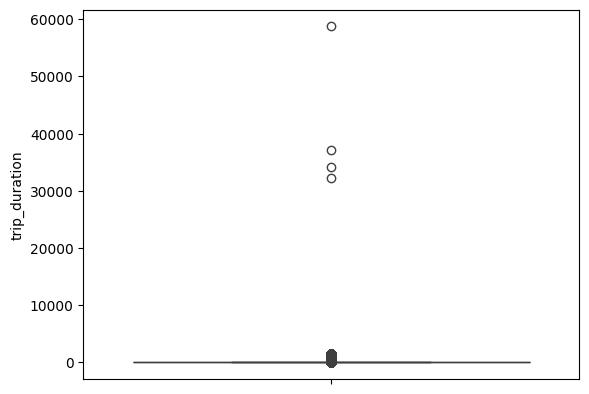

In [24]:
# Box plot
sns.boxplot(target_col_minutes)

In [25]:
(60000/ 60) / 24


41.666666666666664

In [26]:
# extreme points in the data (results in hours)
target_col_minutes[target_col_minutes > 5000]/60 

355003    538.815556
680594    569.327222
924150    618.781111
978383    979.522778
Name: trip_duration, dtype: float64

In [27]:
# Extreme points in the complete data 
taxi_df[target_col_minutes > 5000]


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


In [28]:
# Droping the extreme points in the data 
target_col_minutes.drop(index=target_col_minutes[target_col_minutes > 5000].index,inplace=True)


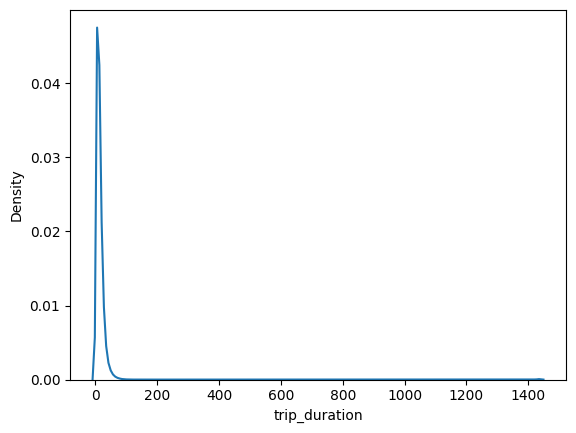

In [29]:
sns.kdeplot(target_col_minutes)
plt.show()

In [30]:
target_col_minutes.describe().reset_index()

,index,trip_duration
0,count,1.458640e+06
1,mean,1.588025e+01
2,std,5.285537e+01
3,min,1.666667e-02
4,25%,6.616667e+00
5,50%,1.103333e+01
6,75%,1.791667e+01
7,max,1.439867e+03


In [31]:
1.439867e+03/60

23.997783333333334

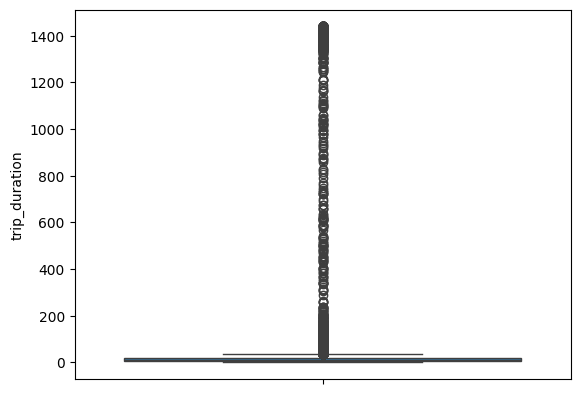

In [32]:
sns.boxplot(target_col_minutes)
plt.show()

In [33]:
target_column_hours = taxi_df['trip_duration']/3600
target_column_hours

0          0.126389
1          0.184167
2          0.590000
3          0.119167
4          0.120833
             ...   
1458639    0.216111
1458640    0.181944
1458641    0.212222
1458642    0.103611
1458643    0.055000
Name: trip_duration, Length: 1458644, dtype: float64

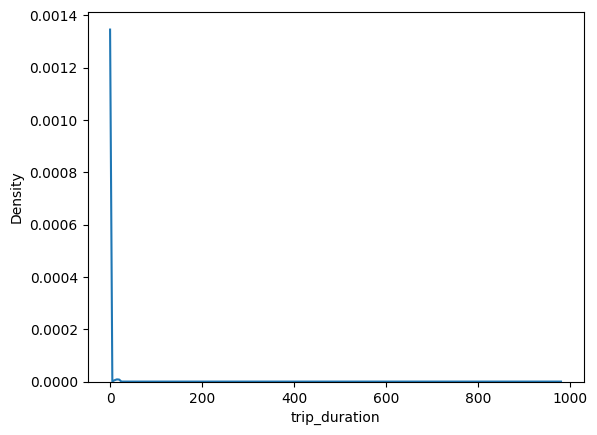

In [34]:
sns.kdeplot(target_column_hours)
plt.show()

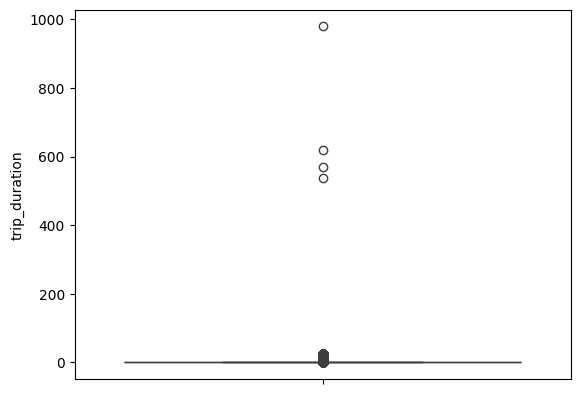

In [35]:
sns.boxplot(target_column_hours)
plt.show()

In [36]:
1000/24

41.666666666666664

In [37]:
# Calculate the upper limit based on IQR approach
Q1_target,Q3_target = target_column_hours.quantile([0.25,0.75])

IQR_target = Q3_target - Q1_target

print(f"Q1 = {Q1_target*60:.2f} minutes ",f"Q3 = {Q3_target*60:.2f} minutes")

print(f"IQR = {IQR_target*60:.2f} minutes")

upper_bound_target = Q3_target + (1.5*IQR_target)

print(f"Upper bound of target is {upper_bound_target*60:.2f} minutes")

Q1 = 6.62 minutes  Q3 = 17.92 minutes
IQR = 11.30 minutes
Upper bound of target is 34.87 minutes


In [38]:
sum(target_column_hours > upper_bound_target)


74220

In [39]:
# distribution of pickup latitude and longitude above upper limit 
x_temp = taxi_df.loc[(target_column_hours>upper_bound_target),:].copy()

x_temp.loc[:,'trip_duration'] = x_temp['trip_duration']/3600


C:\Users\surya\AppData\Local\Temp\ipykernel_10912\2447738071.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.59       0.64333333 0.69027778 ... 0.58138889 1.06138889 0.65416667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_temp.loc[:,'trip_duration'] = x_temp['trip_duration']/3600


<Axes: ylabel='trip_duration'>

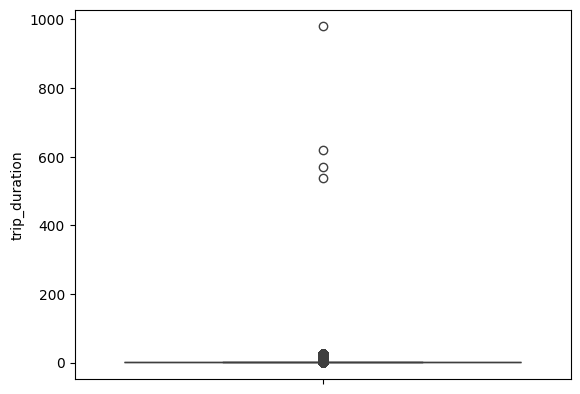

In [40]:
# boxplot for the target column
sns.boxplot(data=x_temp,y='trip_duration')

In [41]:
# remove the extreme points
drop_indices = x_temp[x_temp['trip_duration']>100].index
drop_indices

Index([355003, 680594, 924150, 978383], dtype='int64')

In [42]:
# drop the extreme points
x_temp.drop(index=drop_indices,inplace=True)

[]

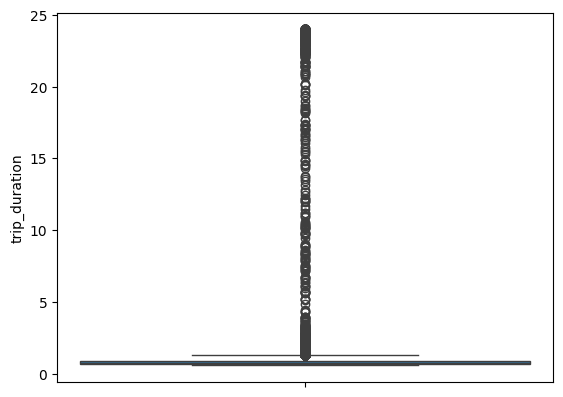

In [43]:
# boxplot without extreme points
sns.boxplot(data=x_temp,y='trip_duration')
plt.plot()

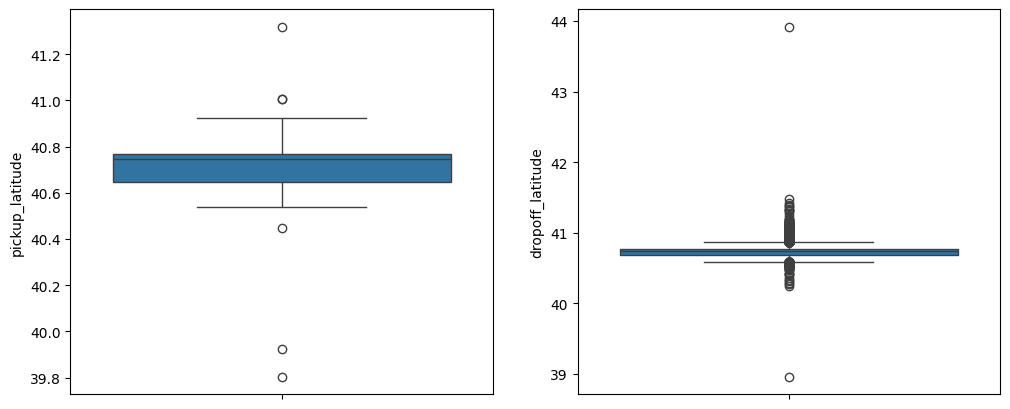

In [44]:
# boxplot for latitudes 
fig = plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sns.boxplot(data=x_temp,y='pickup_latitude')
plt.subplot(1,2,2)
sns.boxplot(data=x_temp,y='dropoff_latitude')
plt.show()

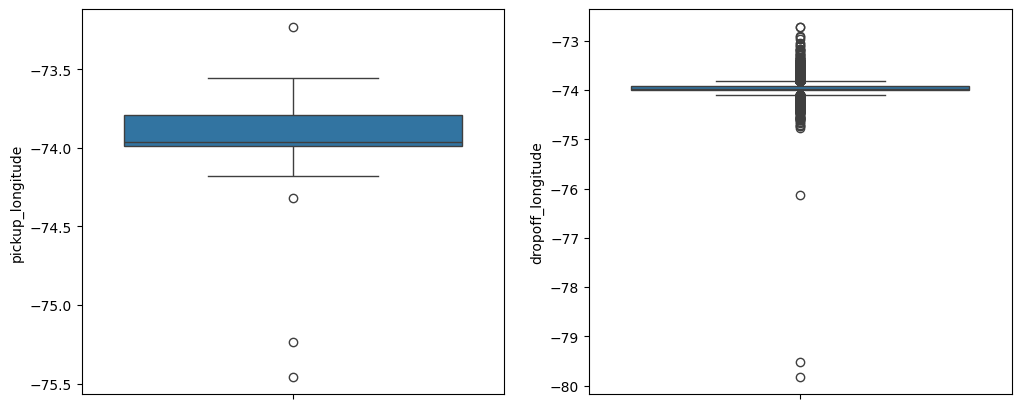

In [45]:
# boxplot for longitudes 
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sns.boxplot(data=x_temp,y='pickup_longitude')
plt.subplot(1,2,2)
sns.boxplot(data=x_temp,y='dropoff_longitude')
plt.show()

In [46]:
def detect_outliers(data,columns,fold=1.5):
    data_temp = data.copy()
    new_df = pd.DataFrame(columns=columns)
    for col in columns:
        Q1,Q3 = data_temp[col].quantile([0.25,0.75])
        IQR = Q3-Q1
        upper_bound = Q3 + (fold*IQR)
        lower_bound = Q1 - (fold*IQR)
        filter_data = data_temp.loc[(data_temp[col]<=lower_bound) | (data_temp[col]>=upper_bound)]
        new_df = pd.concat([new_df,filter_data])
    return new_df

In [47]:
# outliers in co ordinates
detect_outliers(data=x_temp,columns=['pickup_latitude'])

C:\Users\surya\AppData\Local\Temp\ipykernel_10912\3395159387.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df,filter_data])


,pickup_latitude,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
66344,41.006001,id0240882,1.0,2016-03-11 11:09:48,2016-03-11 12:36:54,1.0,-73.688805,-74.005753,40.725510,N,1.451667
73414,41.319164,id0098463,1.0,2016-03-30 19:32:16,2016-03-30 20:25:26,2.0,-74.126724,-73.935120,40.829666,N,0.886111
114376,39.803932,id1311087,1.0,2016-02-29 12:16:29,2016-02-29 18:47:09,3.0,-75.455917,-73.796021,40.707726,N,6.511111
981237,40.446159,id2004335,2.0,2016-05-02 23:45:19,2016-05-03 00:48:37,1.0,-74.317749,-73.987099,40.723618,N,1.055000
1226891,41.003960,id2571106,1.0,2016-01-17 17:10:42,2016-01-17 17:47:33,1.0,-73.682144,-73.913017,40.767632,Y,0.614167
1416336,39.923027,id3795134,1.0,2016-03-21 20:54:00,2016-03-22 01:43:23,3.0,-75.238327,-73.922577,40.610130,N,4.823056


In [48]:
# outliers in co ordinates

detect_outliers(data=x_temp,columns=['dropoff_latitude'],fold=5)

C:\Users\surya\AppData\Local\Temp\ipykernel_10912\3395159387.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df,filter_data])


,dropoff_latitude,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,store_and_fwd_flag,trip_duration
14502,41.311520,id1092161,1.0,2016-04-15 22:35:08,2016-04-16 00:34:21,1.0,-73.781792,40.644718,-72.711395,N,1.986944
108729,41.181141,id2000225,2.0,2016-01-15 20:25:02,2016-01-15 21:10:39,1.0,-73.863182,40.769417,-73.849640,N,0.760278
112247,41.334740,id0479538,1.0,2016-01-02 20:50:36,2016-01-02 22:18:34,1.0,-73.789871,40.643410,-73.684250,N,1.466111
136925,41.143021,id1493150,2.0,2016-02-28 22:13:20,2016-02-28 23:31:55,2.0,-73.990723,40.749851,-73.258476,N,1.309722
189789,41.197395,id2172310,2.0,2016-06-08 17:25:27,2016-06-08 18:44:37,1.0,-73.872871,40.774067,-73.725464,N,1.319444
231336,41.201595,id2108994,1.0,2016-05-19 11:29:19,2016-05-19 12:38:19,1.0,-73.788795,40.642273,-73.684677,N,1.150000
236614,40.293289,id3765151,1.0,2016-04-09 12:20:12,2016-04-09 13:28:22,1.0,-73.992142,40.751850,-74.647537,N,1.136111
273277,41.134434,id3572837,2.0,2016-01-27 23:01:44,2016-01-27 23:49:33,1.0,-73.996887,40.744556,-73.854599,N,0.796944
396966,41.480755,id3476102,1.0,2016-02-19 20:03:37,2016-02-19 21:32:20,1.0,-73.784843,40.648506,-73.625992,N,1.478611
397526,38.963852,id0982904,1.0,2016-04-28 13:32:14,2016-04-28 14:14:09,2.0,-73.870682,40.773598,-79.817978,N,0.698611


In [49]:
x_temp['passenger_count'].value_counts()

passenger_count
1    49654
2    12682
5     4224
3     3338
6     2528
4     1786
0        4
Name: count, dtype: int64

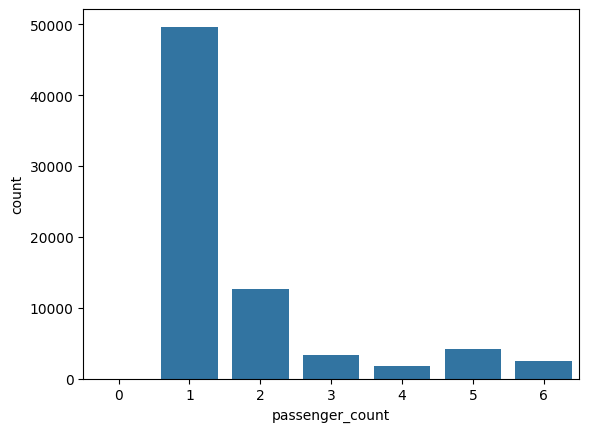

In [50]:
# distribution of passenger count

sns.countplot(data=x_temp,x='passenger_count')
plt.show()

In [51]:
# rides where passenger count was 0
x_temp[x_temp['passenger_count']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62744,id3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,23.861389
217765,id3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,0.625278
676906,id0878599,1,2016-01-25 08:46:58,2016-01-25 09:41:01,0,-73.928078,40.736412,-73.985519,40.758972,N,0.900833
1257574,id1205792,1,2016-03-11 12:33:17,2016-03-11 13:09:48,0,-73.982063,40.763798,-74.188072,40.694042,N,0.608611


In [52]:
# passenger count and vendor id relation
pd.crosstab(index=x_temp['passenger_count'],columns=x_temp['vendor_id'],normalize='columns') *100

vendor_id,1,2
passenger_count,,
0,0.009223,0.002399
1,72.649021,62.422338
2,19.677826,15.067047
3,4.595899,4.421043
4,2.914323,2.010219
5,0.104522,10.051095
6,0.049187,6.025859


In [53]:
# trip duration summary
pd.pivot_table(data=x_temp,values='trip_duration',index='passenger_count',columns='vendor_id',aggfunc=['min','max','median','mean'])

min                   max               median  \
vendor_id               1          2          1          2         1   
passenger_count                                                        
0                0.608611  23.861389   0.900833  23.861389  0.625278   
1                0.581389   0.581389  14.548889  23.997500  0.715278   
2                0.581389   0.581389   3.393889  23.997778  0.738611   
3                0.581389   0.581389   6.511111  23.990278  0.737222   
4                0.581389   0.582222   2.756111  23.994167  0.762778   
5                0.592222   0.581389   3.198056  23.993889  0.789167   
6                0.613056   0.581389   1.289722  23.993611  0.775139   

                                mean             
vendor_id                2         1          2  
passenger_count                                  
0                23.861389  0.711574  23.861389  
1                 0.737778  0.785198   1.849816  
2                 0.746111  0.806634   1.872925  
3                 0.730556  0.815239   2.195668  
4                 0.741944  0.825782   2.307446  
5                 0.733194  0.910417   1.925607  
6                 0.739583  0.849201   1.964516

- The maximum trip duration in vendor 2 nears toward 1 day as compared to vendor 1.
- This suggests that for longer trips people prefer vendor 2 as compared to vendor 1

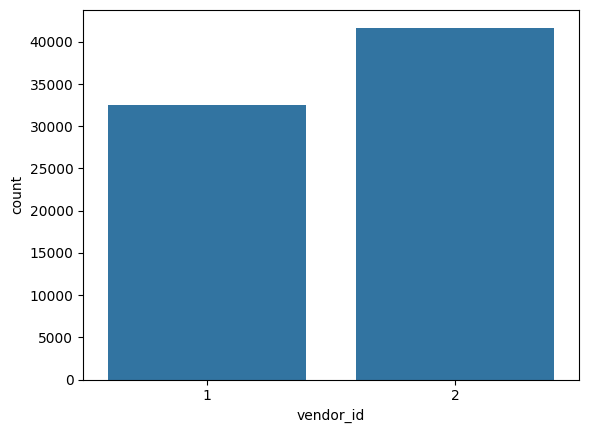

In [54]:
# distribution of passenger count
sns.countplot(data=x_temp,x='vendor_id')
plt.show()

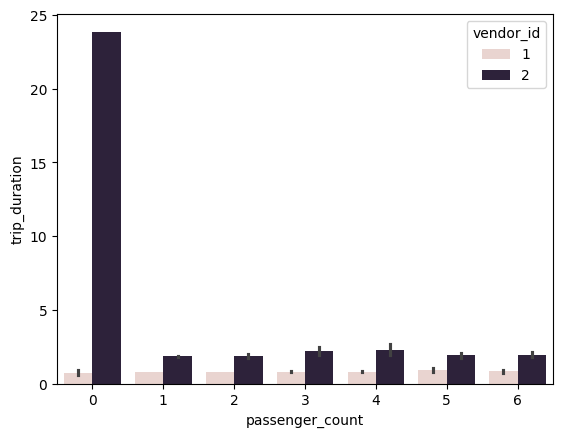

In [55]:
# avg trip duration in hours based on passenger count
sns.barplot(data=x_temp,x='passenger_count',y='trip_duration',hue='vendor_id')
plt.show()

In [56]:
# aggregate stats
target_col_minutes.agg(func=['min','max','median','mean'])

min          0.016667
max       1439.866667
median      11.033333
mean        15.880254
Name: trip_duration, dtype: float64

The value for 90.00 percentile: 27.23 minutes
The value for 91.00 percentile: 28.38 minutes
The value for 92.00 percentile: 29.67 minutes
The value for 93.00 percentile: 31.15 minutes
The value for 94.00 percentile: 32.92 minutes
The value for 95.00 percentile: 35.07 minutes
The value for 96.00 percentile: 37.88 minutes
The value for 97.00 percentile: 41.62 minutes
The value for 98.00 percentile: 47.15 minutes
The value for 99.00 percentile: 57.33 minutes


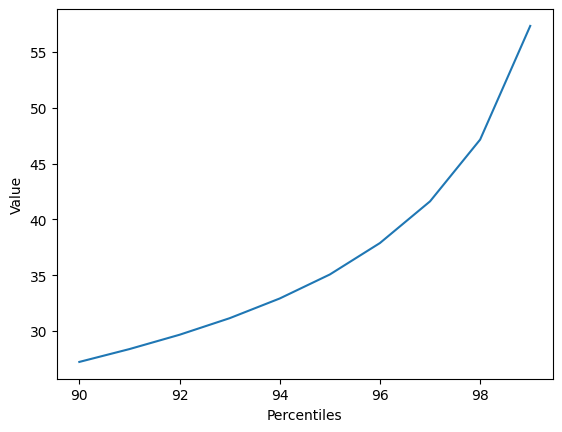

In [57]:
# print percentile values in data
percentiles = np.arange(0.9,1.0,0.01)
res_list = []
for quant in percentiles:
    res = target_col_minutes.quantile(quant)
    res_list.append(res)
    print(f"The value for {quant * 100:.2f} percentile: {res:.2f} minutes")

#plot the graph 
plt.plot(percentiles*100,res_list)
plt.xlabel('Percentiles')
plt.ylabel('Value')
plt.show()

The value for 99.00 percentile: 57.33 minutes
The value for 99.10 percentile: 59.00 minutes
The value for 99.20 percentile: 60.87 minutes
The value for 99.30 percentile: 63.03 minutes
The value for 99.40 percentile: 65.69 minutes
The value for 99.50 percentile: 68.98 minutes
The value for 99.60 percentile: 73.37 minutes
The value for 99.70 percentile: 79.38 minutes
The value for 99.80 percentile: 92.48 minutes
The value for 99.90 percentile: 1418.67 minutes
The value for 100.00 percentile: 1439.87 minutes


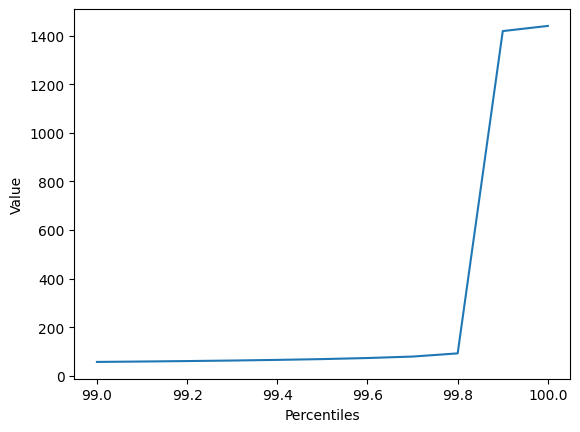

In [58]:
# print percentile values in data
percentiles = np.arange(0.99,1.0,0.001)
res_list = []
for quant in percentiles:
    res = target_col_minutes.quantile(quant)
    res_list.append(res)
    print(f"The value for {quant * 100:.2f} percentile: {res:.2f} minutes")

#plot the graph 
plt.plot(percentiles*100,res_list)
plt.xlabel('Percentiles')
plt.ylabel('Value')
plt.show()

The value for 99.70 percentile: 79.38 minutes
The value for 99.71 percentile: 80.15 minutes
The value for 99.72 percentile: 81.10 minutes
The value for 99.73 percentile: 82.08 minutes
The value for 99.74 percentile: 83.13 minutes
The value for 99.75 percentile: 84.21 minutes
The value for 99.76 percentile: 85.67 minutes
The value for 99.77 percentile: 87.10 minutes
The value for 99.78 percentile: 88.65 minutes
The value for 99.79 percentile: 90.38 minutes
The value for 99.80 percentile: 92.48 minutes
The value for 99.81 percentile: 95.13 minutes
The value for 99.82 percentile: 98.25 minutes
The value for 99.83 percentile: 103.02 minutes
The value for 99.84 percentile: 110.31 minutes
The value for 99.85 percentile: 133.00 minutes
The value for 99.86 percentile: 436.64 minutes
The value for 99.87 percentile: 1331.58 minutes
The value for 99.88 percentile: 1390.89 minutes
The value for 99.89 percentile: 1409.11 minutes
The value for 99.90 percentile: 1418.67 minutes
The value for 99.91 pe

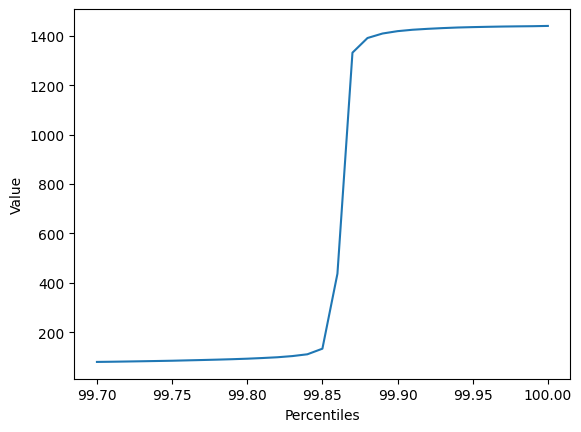

In [59]:
# print percentile values in data
percentiles = np.arange(0.997,1.0,0.0001)
res_list = []
for quant in percentiles:
    res = target_col_minutes.quantile(quant)
    res_list.append(res)
    print(f"The value for {quant * 100:.2f} percentile: {res:.2f} minutes")

#plot the graph 
plt.plot(percentiles*100,res_list)
plt.xlabel('Percentiles')
plt.ylabel('Value')
plt.show()

In [60]:
# number of values above 100 minutes mark
time_range = np.arange(100,1100,100)
prev_val = 0
for time in time_range:
    value = target_col_minutes[target_col_minutes>=time].size
    print(f"{time}={value}  diff={np.abs(value-prev_val)}")

    prev_val = value

100=2563  diff=2563
200=2092  diff=471
300=2068  diff=24
400=2049  diff=19
500=2028  diff=21
600=2008  diff=20
700=1991  diff=17
800=1980  diff=11
900=1969  diff=11
1000=1957  diff=12


In [61]:
normal_durations_df = taxi_df.loc[(taxi_df['trip_duration']/60)<=100,:].copy()
normal_durations_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [62]:
extreme_time_durations_df = taxi_df.loc[(taxi_df['trip_duration']/60)>100,:].copy()
extreme_time_durations_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
354,id3402983,2,2016-06-30 15:48:06,2016-06-30 17:31:13,1,-73.781898,40.644772,-73.985893,40.760159,N,6187
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,84594
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,86352
3092,id0296060,2,2016-06-16 08:07:39,2016-06-16 10:11:39,2,-73.779083,40.647491,-74.006996,40.708523,N,7440
...,...,...,...,...,...,...,...,...,...,...,...
1455536,id2199367,1,2016-05-13 14:58:45,2016-05-13 16:40:49,1,-73.983116,40.771484,-73.789848,40.643478,N,6124
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,N,86233
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,N,85311
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,N,86314


In [63]:
# save the data where the trip duration is 100 min 
df_path = "../data/processed/train.csv"
normal_durations_df.to_csv(df_path)

In [64]:
# borders of nyc
latitude_coord = taxi_df['pickup_latitude'].quantile([0.01,0.99]).sort_values(ascending=False) + np.array([0.05,-0.05])
longitude_coord = taxi_df['pickup_longitude'].quantile([0.01,0.99]).sort_values(ascending=False) + np.array([0.1,-0.1])

In [65]:
longitude_coord

0.99   -73.682227
0.01   -74.114317
Name: pickup_longitude, dtype: float64

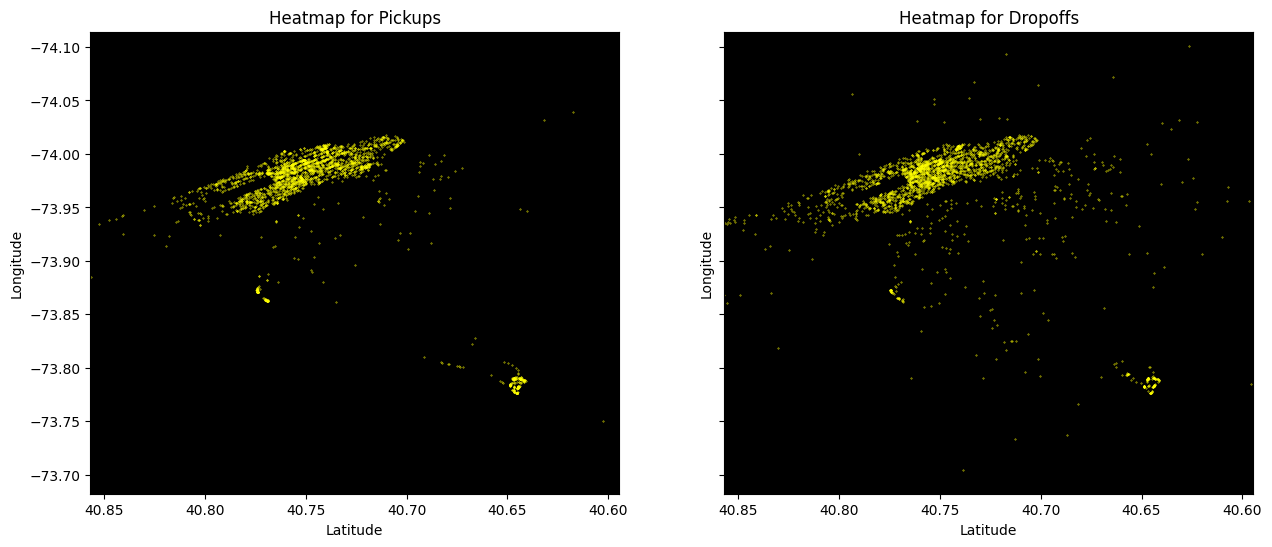

In [66]:
# heatmap of the pickups and dropoffs where trip duration was greater than 100 min
fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))


ax[0].set_facecolor('k')
ax[0].scatter(extreme_time_durations_df['pickup_latitude'],extreme_time_durations_df['pickup_longitude'],s=0.1,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(extreme_time_durations_df['dropoff_latitude'],extreme_time_durations_df['dropoff_longitude'],s=0.1,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

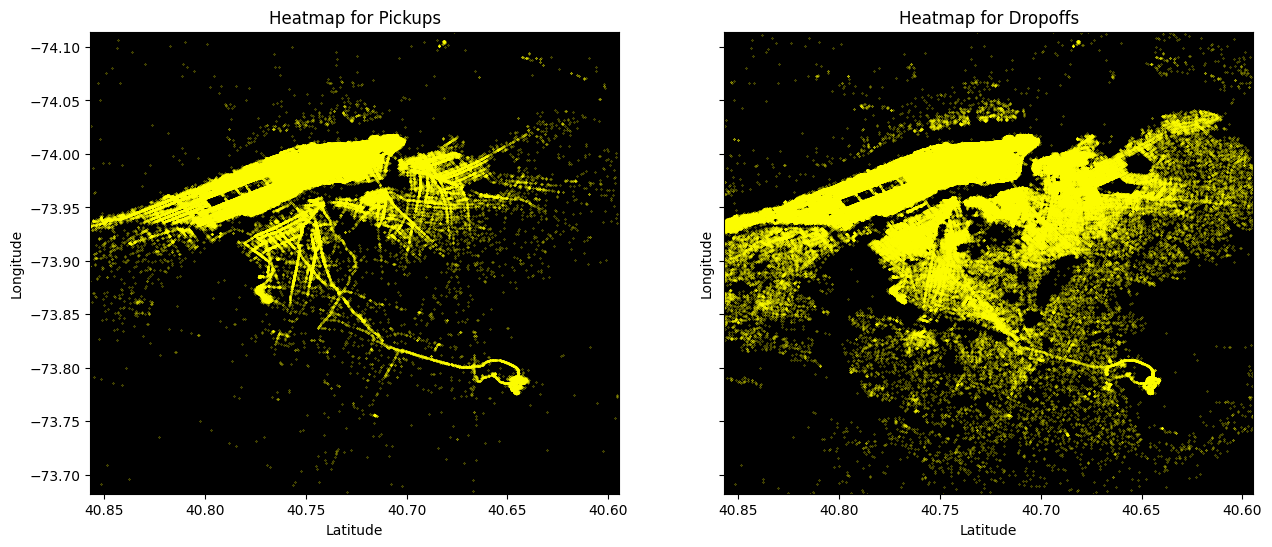

In [67]:
# heatmap of the pickups and dropoffs where trip duration was less than 100 min

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(normal_durations_df['pickup_latitude'],normal_durations_df['pickup_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(normal_durations_df['dropoff_latitude'],normal_durations_df['dropoff_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()


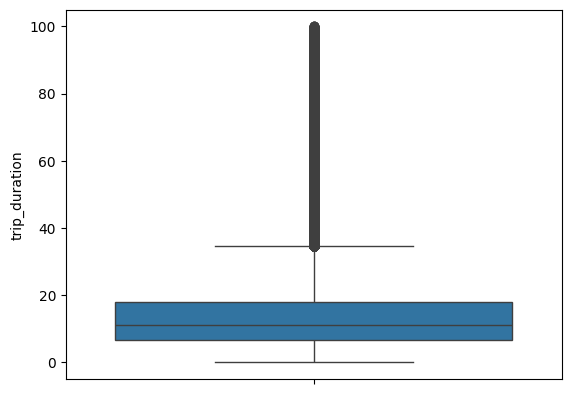

In [68]:
# distribution of target col when max time duration is less than or equals 100 min

sns.boxplot(target_col_minutes[target_col_minutes <= 100])
plt.show()

In [69]:
# passenger count in datasets

print(normal_durations_df['passenger_count'].unique())
print(extreme_time_durations_df['passenger_count'].unique())

[1 6 4 2 3 5 0 7 9 8]
[1 3 6 2 5 4 0]


In [70]:
normal_durations_df.loc[:,'trip_duration'] = normal_durations_df['trip_duration'] / 60
extreme_time_durations_df.loc[:,'trip_duration'] = extreme_time_durations_df['trip_duration'] / 60

C:\Users\surya\AppData\Local\Temp\ipykernel_10912\3266232534.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 7.58333333 11.05       35.4        ... 12.73333333  6.21666667
  3.3       ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normal_durations_df.loc[:,'trip_duration'] = normal_durations_df['trip_duration'] / 60
C:\Users\surya\AppData\Local\Temp\ipykernel_10912\3266232534.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 103.11666667 1409.9        1435.81666667 ... 1421.85       1438.56666667
 1437.7       ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  extreme_time_durations_df.loc[:,'trip_duration'] = extreme_time_durations_df['trip_duration'] / 60


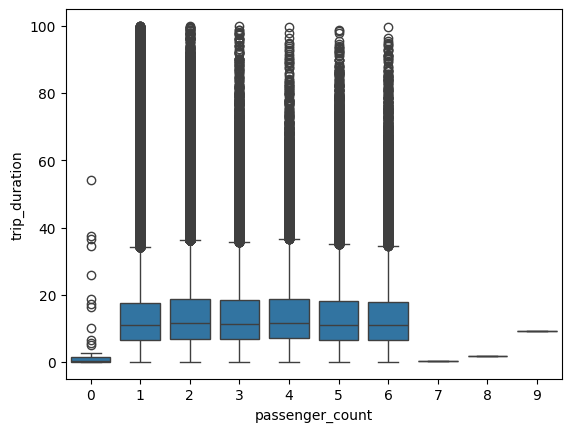

In [71]:
# box plots based on passenger count (To check whether passsenger count makes a diff)

sns.boxplot(data=normal_durations_df,x='passenger_count',y='trip_duration')
plt.show()

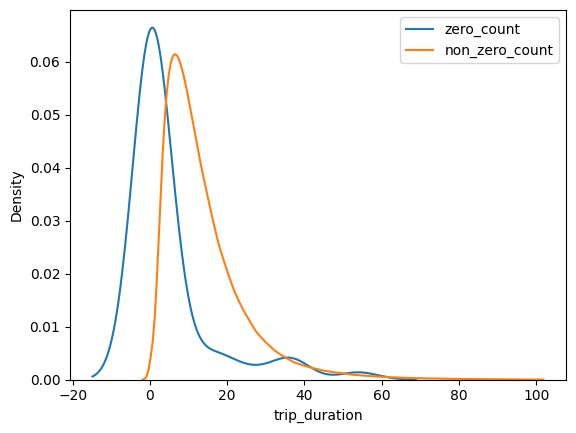

In [72]:
# Comapring distribution of time where passenger count is zero and non-zero
sns.kdeplot(data=normal_durations_df.loc[normal_durations_df['passenger_count']==0,:],x='trip_duration',label='zero_count')
sns.kdeplot(data=normal_durations_df.loc[normal_durations_df['passenger_count']!=0,:],x='trip_duration',label='non_zero_count')
plt.legend()
plt.show()

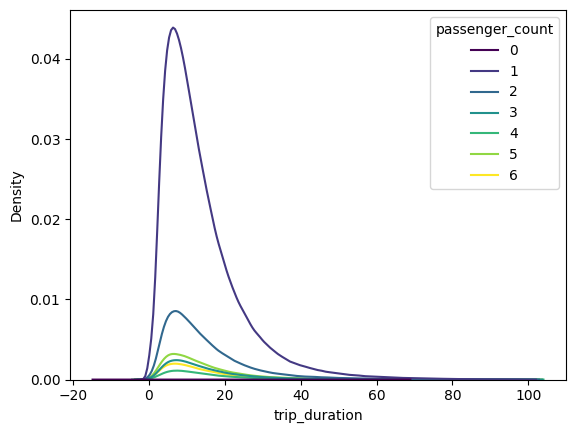

In [73]:
passenger_count_range = list(range(0,7))

sns.kdeplot(data=normal_durations_df.loc[normal_durations_df['passenger_count'].isin(passenger_count_range),:],
            x='trip_duration',hue='passenger_count',palette='viridis')
plt.show()

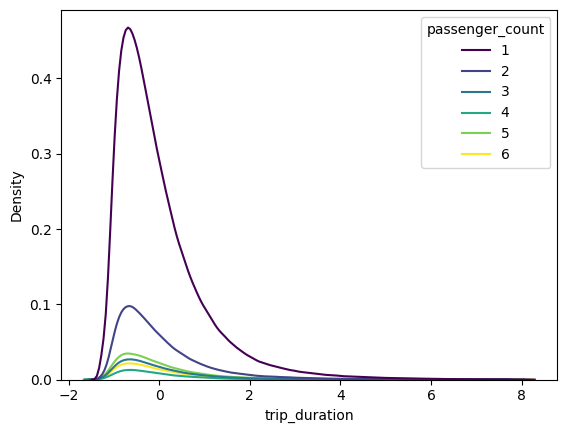

In [74]:
# kde plot for distribution based on passenger count (standardized)

passenger_count_grp = normal_durations_df.groupby('passenger_count')

#standardize each distribution

temp_df = pd.DataFrame()
temp_df['passenger_count'] = normal_durations_df['passenger_count'].copy()

temp_df['trip_duration'] = passenger_count_grp['trip_duration'].transform(lambda x: (x - x.mean()) / x.std())

passenger_count_range = list(range(1,7))

sns.kdeplot(data=temp_df.loc[temp_df['passenger_count'].isin(passenger_count_range),:],
            x='trip_duration',hue='passenger_count',palette='viridis')
plt.show()

In [75]:
extreme_time_durations_df = extreme_time_durations_df.loc[extreme_time_durations_df['trip_duration'] < 10000,:]

In [76]:
extreme_time_durations_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
354,id3402983,2,2016-06-30 15:48:06,2016-06-30 17:31:13,1,-73.781898,40.644772,-73.985893,40.760159,N,103.116667
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,1409.900000
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,1435.816667
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,1439.200000
3092,id0296060,2,2016-06-16 08:07:39,2016-06-16 10:11:39,2,-73.779083,40.647491,-74.006996,40.708523,N,124.000000
...,...,...,...,...,...,...,...,...,...,...,...
1455536,id2199367,1,2016-05-13 14:58:45,2016-05-13 16:40:49,1,-73.983116,40.771484,-73.789848,40.643478,N,102.066667
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,N,1437.216667
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,N,1421.850000
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,N,1438.566667


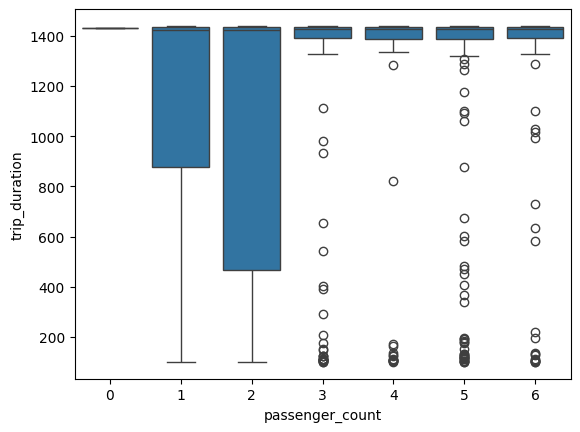

In [77]:
# box plots based on passenger count (To check whether passsenger count makes a diff)

sns.boxplot(data=extreme_time_durations_df,x='passenger_count',y='trip_duration')
plt.show()

In [78]:
# skewness of the output column
normal_durations_df['trip_duration'].skew()

np.float64(2.1161167221274226)

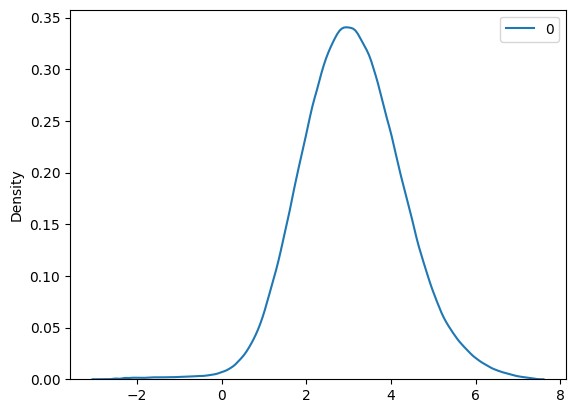

In [79]:
# apply box-cox transformation
from sklearn.preprocessing import PowerTransformer

pt_target = PowerTransformer(method='box-cox',standardize=False)

# transform the output column

trip_duration_trans = pt_target.fit_transform(normal_durations_df[['trip_duration']])

sns.kdeplot(trip_duration_trans)
plt.show()

In [80]:
taxi_df['id'].head()

0    id2875421
1    id2377394
2    id3858529
3    id3504673
4    id2181028
Name: id, dtype: object

In [81]:
#Remove id tag from the data 
def remove_id_tag(data):
    data['id'] = data['id'].str.replace('id','')
    return data['id']

remove_id_tag(taxi_df)

0          2875421
1          2377394
2          3858529
3          3504673
4          2181028
            ...   
1458639    2376096
1458640    1049543
1458641    2304944
1458642    2714485
1458643    1209952
Name: id, Length: 1458644, dtype: object

In [82]:
# remove tag from test data
remove_id_tag(taxi_test)

0         3004672
1         3505355
2         1217141
3         2150126
4         1598245
           ...   
625129    3008929
625130    3700764
625131    2568735
625132    1384355
625133    0621643
Name: id, Length: 625134, dtype: object

In [83]:
# convert the id column to integer
taxi_df['id'] = taxi_df['id'].astype('int')
taxi_test['id'] = taxi_test['id'].astype('int')

In [84]:
# test if id column is required
def test_id_column(data):
    if data.shape[0] == data['id'].nunique():
        new_data = data.drop(columns = 'id')
        return new_data
    else:
        return data 

In [85]:
taxi_df_new = test_id_column(taxi_df)
taxi_test_new = test_id_column(taxi_test)

In [86]:
# categories in vendor_id
taxi_df_new['vendor_id'].value_counts()

vendor_id
2    780302
1    678342
Name: count, dtype: int64

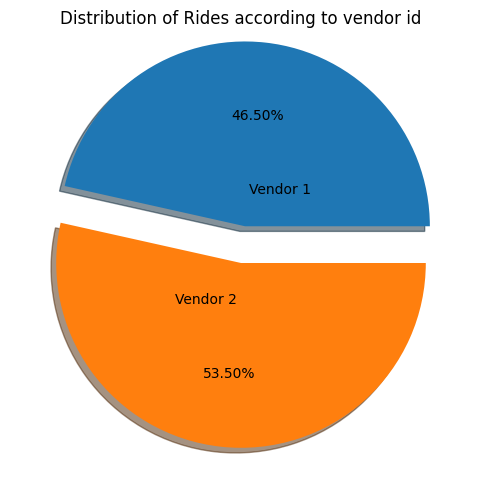

In [87]:
# pie chart showing distributions
fig = plt.figure(figsize=(12,6))
plt.pie(taxi_df_new['vendor_id'].value_counts().sort_index(),autopct='%.2f%%',explode=[0.2,0],shadow=True,
        labels=['Vendor 1',"Vendor 2"],labeldistance=0.2)
plt.title('Distribution of Rides according to vendor id')
plt.show()

- People are more likely to select vendor 2 for its services as compared to vendor 1.

In [88]:
taxi_df_new['dropoff_datetime'] = pd.to_datetime(taxi_df_new['dropoff_datetime'])
taxi_df_new['pickup_datetime'] = pd.to_datetime(taxi_df_new['pickup_datetime'])

In [89]:
taxi_test_new['pickup_datetime'] = pd.to_datetime(taxi_test_new['pickup_datetime'])

In [90]:
taxi_df_new.shape

(1458644, 10)

In [91]:
taxi_df_new['pickup_datetime'].dt.weekday

0          0
1          6
2          1
3          2
4          5
          ..
1458639    4
1458640    6
1458641    4
1458642    1
1458643    1
Name: pickup_datetime, Length: 1458644, dtype: int32

In [92]:
# feature extraction

def make_datetime_features(data,column_type):
    data[f'{column_type}_hour'] = data[f'{column_type}_datetime'].dt.hour 
    data[f'{column_type}_date'] = data[f'{column_type}_datetime'].dt.day
    data[f'{column_type}_month'] = data[f'{column_type}_datetime'].dt.month
    data[f'{column_type}_day'] = data[f'{column_type}_datetime'].dt.weekday
    data[f'is_weekend'] = data.apply(lambda row: row[f'{column_type}_day'] >= 5,axis=1).astype('int')
    return data

In [93]:
# datetime features for pickup column in train data 
make_datetime_features(taxi_df_new,'pickup')
# datetime features for pickup column in test data
make_datetime_features(taxi_test_new,'pickup')

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_date,pickup_month,pickup_day,is_weekend
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,23,30,6,3,0
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,23,30,6,3,0
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,23,30,6,3,0
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,23,30,6,3,0
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,23,30,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,0,1,1,4,0
625130,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,0,1,1,4,0
625131,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,0,1,1,4,0
625132,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,0,1,1,4,0


In [94]:
taxi_df_new

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_date,pickup_month,pickup_day,is_weekend
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,14,3,0,0
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,12,6,6,1
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,1,0
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,6,4,2,0
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,26,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,13,8,4,4,0
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,7,10,1,6,1
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6,22,4,4,0
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,15,5,1,1,0


In [95]:
save_path = '../data/dt_train.csv'
taxi_df_new.to_csv(save_path)

In [96]:
taxi_test_new.to_csv('../data/dt_test.csv')

### EDA on Datetime Columns

In [97]:
# time range for the train data 
taxi_df_new['pickup_datetime'].max()-taxi_df_new['pickup_datetime'].min()

Timedelta('181 days 23:59:22')

In [98]:
# time range for the test data
taxi_test_new['pickup_datetime'].max() - taxi_test_new['pickup_datetime'].min()

Timedelta('181 days 23:59:36')

In [99]:
# time range for the train and test data

data_temp = {'Opening_date':[taxi_df_new['pickup_datetime'].min(),taxi_test_new['pickup_datetime'].min()],
            'Closing_date':[taxi_df_new['pickup_datetime'].max(),taxi_test_new['pickup_datetime'].max()]}

pd.DataFrame(data=data_temp,index=['train','test']).T

,train,test
Opening_date,2016-01-01 00:00:17,2016-01-01 00:00:22
Closing_date,2016-06-30 23:59:39,2016-06-30 23:59:58


- This shows that both the train and the test data have ranges from the same dates i.e. from (Jan 1st, 2016) till (June 30th, 2016).



In [100]:
# total pickups each day
taxi_df_new['pickup_datetime'].dt.date.value_counts().sort_index()

pickup_datetime
2016-01-01    7162
2016-01-02    6512
2016-01-03    6353
2016-01-04    6725
2016-01-05    7204
              ... 
2016-06-26    7084
2016-06-27    7311
2016-06-28    7253
2016-06-29    7623
2016-06-30    7588
Name: count, Length: 182, dtype: int64

Idea behind this code:

I needed to find out the pickup pattern of passengers on a particular date in line plots for both the train and test data.
- To do this:

1. Calculated the value counts(count of rows) for each date, which will give me the total no. of pickups in the data for that particular date.
2. Then I sorted the index to reorder the data in correct chronological order.

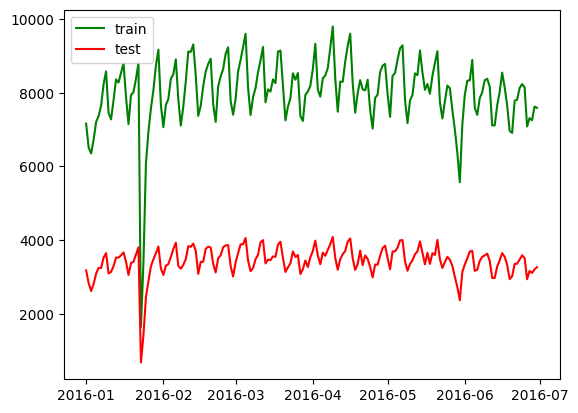

In [101]:
# pickup patterns for train and test data

plt.plot(taxi_df_new['pickup_datetime'].dt.date.value_counts().sort_index(),color='green',label='train')
plt.plot(taxi_test_new['pickup_datetime'].dt.date.value_counts().sort_index(),color='red',label='test')
plt.legend()
plt.show()

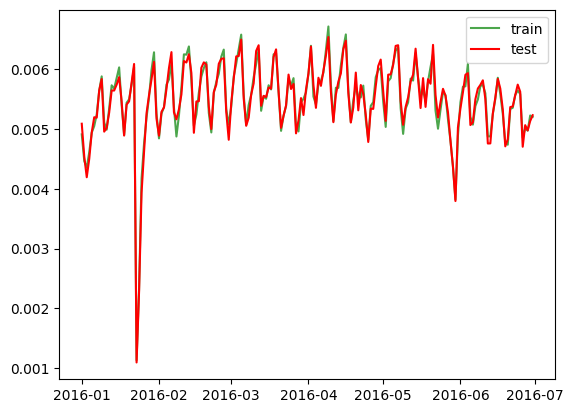

In [102]:
# pickup patterns for train and test data (results normalized) --> equalize the scales

plt.plot(taxi_df_new['pickup_datetime'].dt.date.value_counts(normalize=True).sort_index(),color='green',alpha=0.7,label='train')
plt.plot(taxi_test_new['pickup_datetime'].dt.date.value_counts(normalize=True).sort_index(),color='red',label='test')
plt.legend()
plt.show()

This graph clearly indicates that the pickup patterns for the train and test data are almost similar.

Major Anomaly in the Pickup pattern:

The January 2016 United States blizzard produced up to 3 ft (91 cm) of snow in parts of the Mid-Atlantic and Northeastern United States during January 22–24, 2016

- A travel ban was instituted for New York City and Newark, New Jersey, for January 23–24. The blizzard that walloped New York City in January is officially the biggest snowstorm in the history of the five boroughs, according to a new report prompted by questions about the accuracy of snowfall measurements.

In [103]:
# avg pickups daily across all months

month_group = taxi_df_new.groupby(by='pickup_month')

daily_pickups_mean = month_group['pickup_date'] \
.value_counts() \
.mean()

daily_pickups_mean

np.float64(8014.527472527472)

Idea behind this code:

Group the pickups monthwise.
1. Calculate the pickups for each day in a particular month.
2. Then finally calculate the mean across all the months to get a daily avg

In [104]:
from IPython.display import HTML

def horizontal(dfs):
    # display: flex in CSS means that
    # stuff added to this div is added sideways
    html = '<div style="display:flex">'

    for df in dfs:
        # adding our dataframe HTMLs as child elements
        # margin: 32px forces a 32 pixel spacing between dataframes
        html += '<div style="margin-right: 32px">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'

    # converting our html string to actual HTML so that we can display() it
    display(HTML(html))

In [105]:
# no.of days when pickups were below the daily avg

unique_dates = taxi_df_new['pickup_datetime'].dt.date.value_counts()

below_daily_avg_count = unique_dates[unique_dates<daily_pickups_mean].size

percentage_below_avg = below_daily_avg_count /unique_dates.index.size

print(f'The number of days where number of pickups is below the daily avg is {below_daily_avg_count} which is {(percentage_below_avg * 100):.2f}% of the total days')


The number of days where number of pickups is below the daily avg is 82 which is 45.05% of the total days


In [106]:
# dates where the pickups were below average for each month as compared to the daily average
temp_df = unique_dates[unique_dates<daily_pickups_mean].reset_index().sort_values('pickup_datetime')

temp_df['pickup_datetime'] = pd.to_datetime(temp_df['pickup_datetime'])

temp_df['month'] = temp_df['pickup_datetime'].dt.month

dfs_to_display = []

for month in np.sort(taxi_df_new['pickup_month'].unique()):
    filter_month = temp_df['month']==month
    dfs_to_display.append(temp_df.loc[filter_month,['pickup_datetime','count']].reset_index(drop=True))

horizontal(dfs_to_display)

,pickup_datetime,count
0,2016-01-01,7162
1,2016-01-02,6512
2,2016-01-03,6353
3,2016-01-04,6725
4,2016-01-05,7204
5,2016-01-06,7365
6,2016-01-07,7649
7,2016-01-10,7454
8,2016-01-11,7276
9,2016-01-12,7794


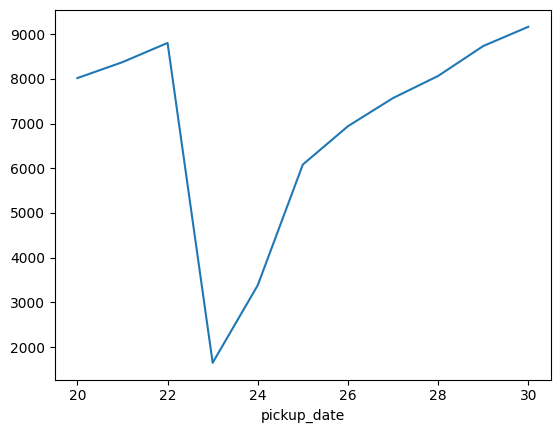

In [107]:
# taxi trips instead of travel bans
ban_df = taxi_df_new[(taxi_df_new['pickup_date'].isin(list(range(20,31)))) & (taxi_df_new['pickup_month']==1)]

ban_df['pickup_date'].value_counts().sort_index().plot()

plt.show()

In [108]:
# number of pickups on travel ban days ie. 23rd & 24th Jan,2016
ban_pickups = ban_df['pickup_date'].value_counts().sort_values()

print(f'Number of Pickups on banned days are {ban_pickups[[23,24]].sum()}')


Number of Pickups on banned days are 5031


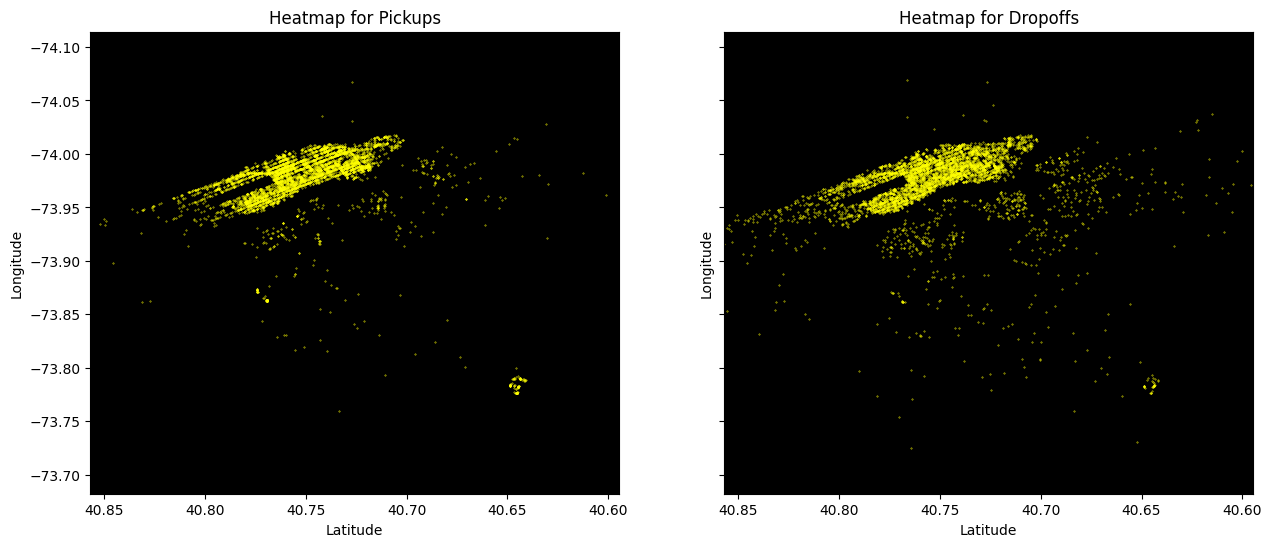

In [109]:
# heatmap of the pickups and dropoffs during the travel ban

ban_df = ban_df.loc[ban_df['pickup_date'].isin([23,24])]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(ban_df['pickup_latitude'],ban_df['pickup_longitude'],s=0.1,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(ban_df['dropoff_latitude'],ban_df['dropoff_longitude'],s=0.1,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

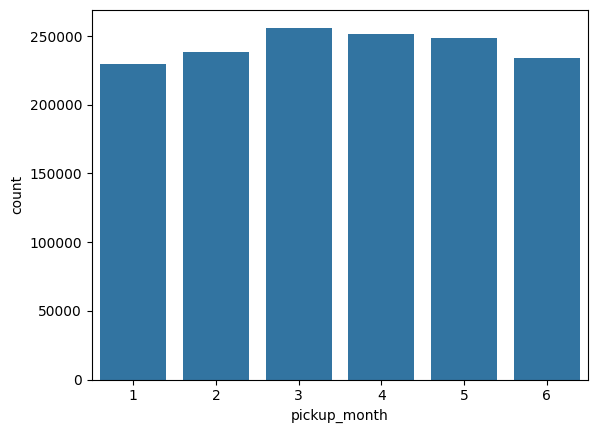

In [110]:
# count of total pickups each month
sns.countplot(data=taxi_df_new,x='pickup_month')

plt.show()

- Less Number of pickups in the month of January can be related to weather events like snow, heavy blizzards or festive season.
- The other reason is that during festive season can drivers in New York expect heavier tips from the passengers, so passengers try to avoid taking cab services and only take when required.

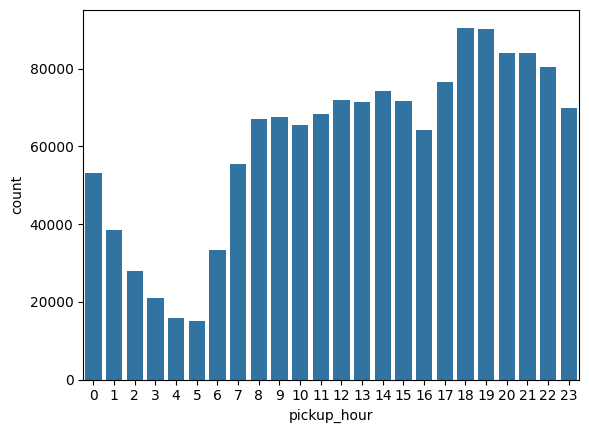

In [111]:
# rush hour for pickup 
sns.countplot(data=taxi_df_new,x='pickup_hour')
plt.show()

__Things to note:__

1. Cab pickups reduce after midnight and pickup pace after daybreak around 6am.
2. Pickups reach peak at 8am and then stabilize till 3pm.
3. Again the pickups gain strength around 6pm till 10pm at night

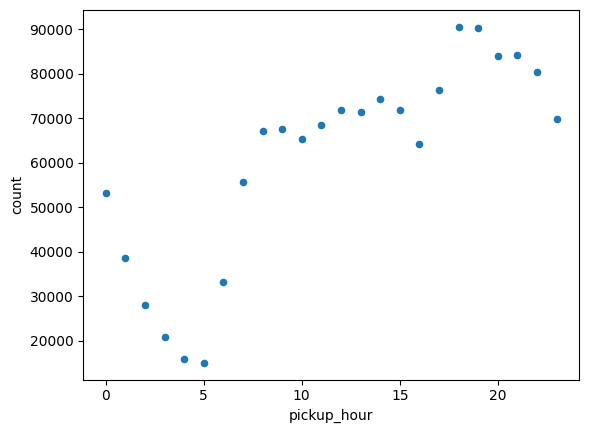

In [112]:
# rush hours divided into 3 clusters. (high rush, avg rush, low rush)

cluster_input = taxi_df_new['pickup_hour'] \
.value_counts() \
.sort_index() \
.reset_index()

cluster_input.plot(x='pickup_hour',y='count',kind='scatter')

plt.show()

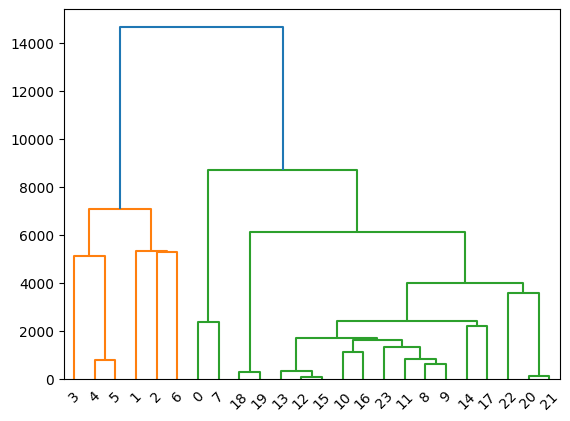

In [113]:
### Agglomerative Clustering 
from scipy.cluster.hierarchy import dendrogram,linkage
clustering = linkage(y=cluster_input.values,method='single')

dendrogram(clustering)
plt.show()

__The dendrogram suggests to take the value of optimum clusters as 2__

In [114]:
from sklearn.cluster import AgglomerativeClustering,KMeans

agglo = AgglomerativeClustering(linkage='single',n_clusters=2)

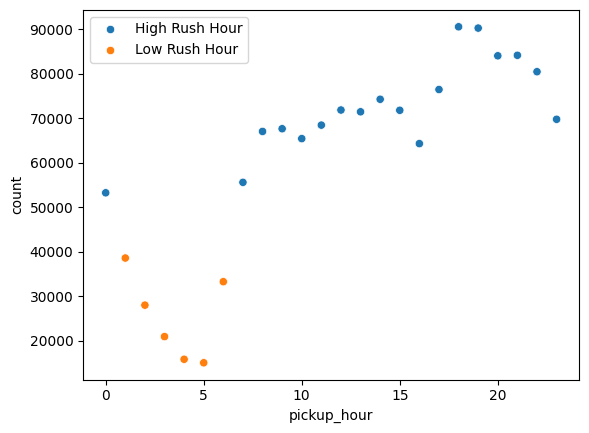

In [115]:
# plot the clusters 
predictions = agglo.fit_predict(cluster_input)

sns.scatterplot(data=cluster_input,x='pickup_hour',y='count',hue=np.where(predictions==0,'High Rush Hour','Low Rush Hour'))

plt.show()

__K Means Clustering__

The Silhoutte score for 2 clusters is  0.730999345100762
The Silhoutte score for 3 clusters is  0.6041879661284338
The Silhoutte score for 4 clusters is  0.6015263924638993
The Silhoutte score for 5 clusters is  0.643595821618139
The Silhoutte score for 6 clusters is  0.5882506032665346


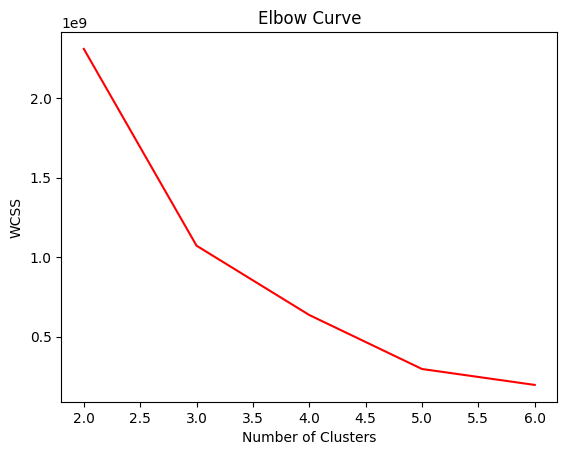

In [116]:
from sklearn.metrics import silhouette_score


n_clusters = [2,3,4,5,6]
inertia_kmeans = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n,n_init=10,max_iter=50)
    predictions = kmeans.fit_predict(cluster_input)

    inertia_kmeans.append(kmeans.inertia_)

    score = silhouette_score(X=cluster_input,labels=predictions)
    print(f"The Silhoutte score for {n} clusters is  {score}")

plt.plot(n_clusters,inertia_kmeans,color = 'red')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [117]:
# Train kmeans with 2 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init=10,max_iter=50)

predictions = kmeans.fit_predict(cluster_input)

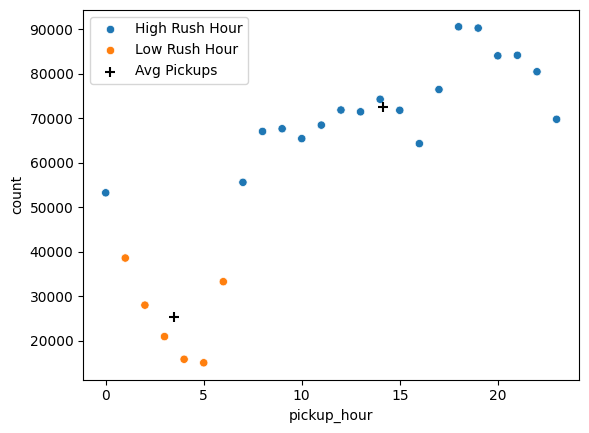

In [118]:
# get the centroids and plot on the curve
cluster_centroids = kmeans.cluster_centers_

#plot the scatter plot
sns.scatterplot(data=cluster_input,x='pickup_hour',y='count',hue=np.where(predictions==0,"High Rush Hour","Low Rush Hour"))

plt.scatter(cluster_centroids[:,0],cluster_centroids[:,1],marker='+',s=60,c='k',label='Avg Pickups')

plt.legend()
plt.show()

In [119]:
# avg pickups when day is weekend
weekend_grp = taxi_df_new.groupby('is_weekend')

weekend_grp['pickup_day'].value_counts().unstack().mean(axis=1)

is_weekend
0    208482.0
1    208117.0
dtype: float64

C:\Users\surya\AppData\Local\Temp\ipykernel_10912\678893190.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekend_grp.apply(calculate_day_avg).unstack(level=0).plot(kind='bar')


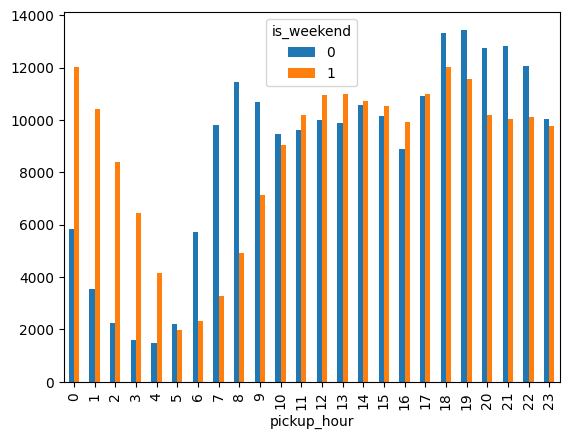

In [120]:
# pickup patterns on hour of weekend and weekdays

def calculate_day_avg(group):
    value_counts = group['pickup_hour'].value_counts()
    number_of_days = group['pickup_day'].nunique()

    group_avg = value_counts/number_of_days

    return group_avg
weekend_grp.apply(calculate_day_avg).unstack(level=0).plot(kind='bar')

plt.show()

__Observations:__

1. People on the weekends travel more at the midnight and late night hours as compared to the weekdays.
2. Cab pickups picks up during morning hours on a weekday but the same is not true for weekends.
3. Late evening hours are busy on both the weekdays and weekends

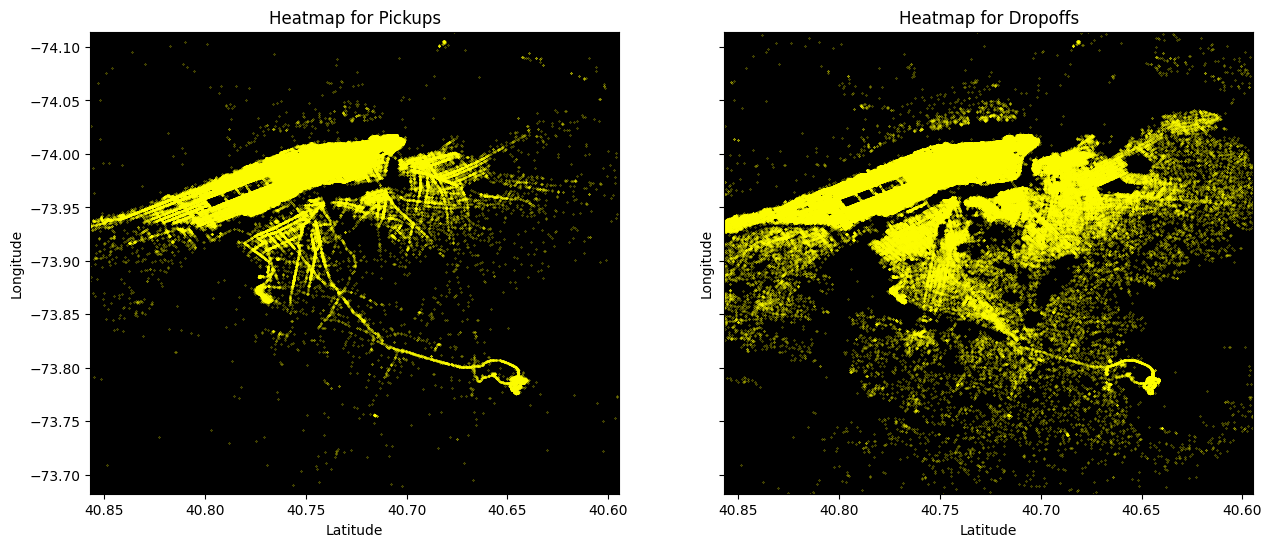

In [121]:
# heatmap of the pickups and dropoffs during the weekdays

temp_df = taxi_df_new.loc[taxi_df_new['is_weekend'] == 0,:]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df['pickup_latitude'],temp_df['pickup_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df['dropoff_latitude'],temp_df['dropoff_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

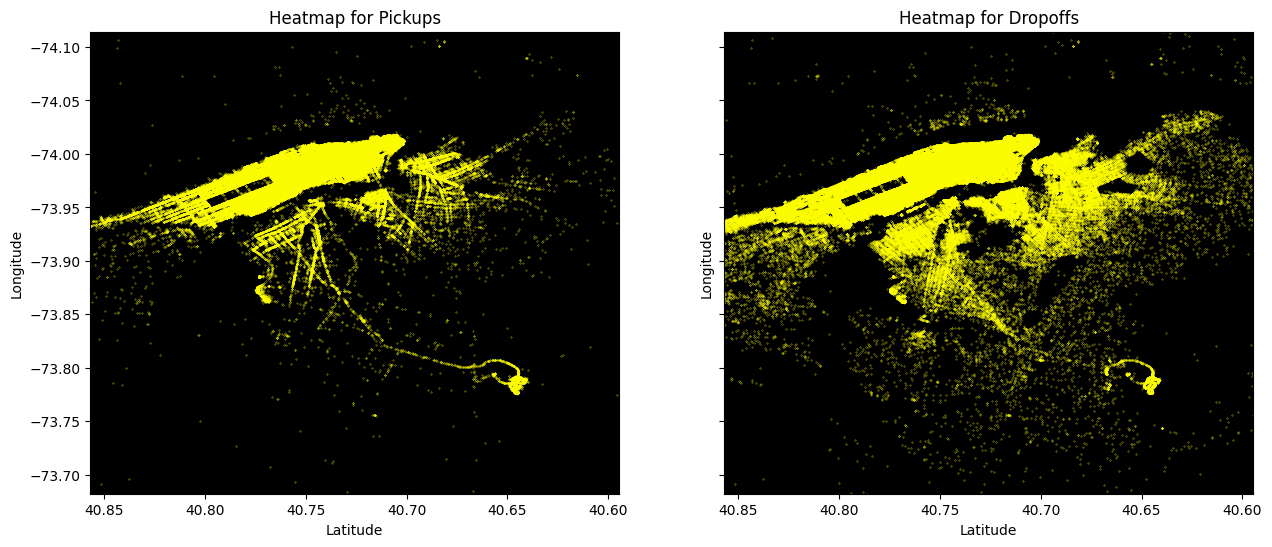

In [122]:
# heatmap of the pickups and dropoffs during the weekends

temp_df = taxi_df_new.loc[taxi_df_new['is_weekend'] == 1,:]

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True,
                     figsize=(15,6))

ax[0].set_facecolor('k')
ax[0].scatter(temp_df['pickup_latitude'],temp_df['pickup_longitude'],s=0.05,color='yellow')
ax[0].set_ylim(longitude_coord)
ax[0].set_xlim(latitude_coord)
ax[0].set_title('Heatmap for Pickups')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].set_facecolor('k')
ax[1].scatter(temp_df['dropoff_latitude'],temp_df['dropoff_longitude'],s=0.05,color='yellow')
ax[1].set_ylim(longitude_coord)
ax[1].set_xlim(latitude_coord)
ax[1].set_title('Heatmap for Dropoffs')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')

plt.show()

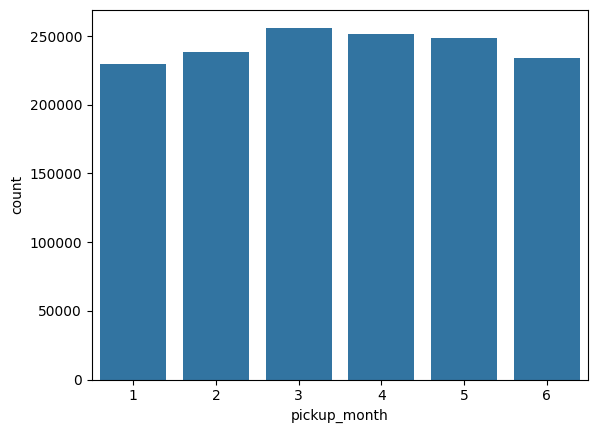

In [124]:
# count of total pickups each month 
sns.countplot(data=taxi_df_new,x='pickup_month')
plt.show()

<Axes: xlabel='pickup_month'>

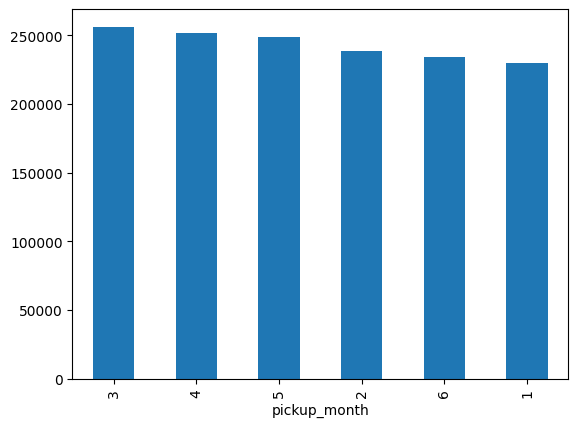

In [125]:
# pickup month sorted in descending order 
taxi_df_new['pickup_month'].value_counts().sort_values(ascending=False).plot(kind='bar')

- There are less number of pickups in month of january may be due to snow,blizzard,etc
- The other reason is that during festive season can drivers in New York expect heavier tips from the passengers, so passengers try to avoid taking cab services and only take when required.

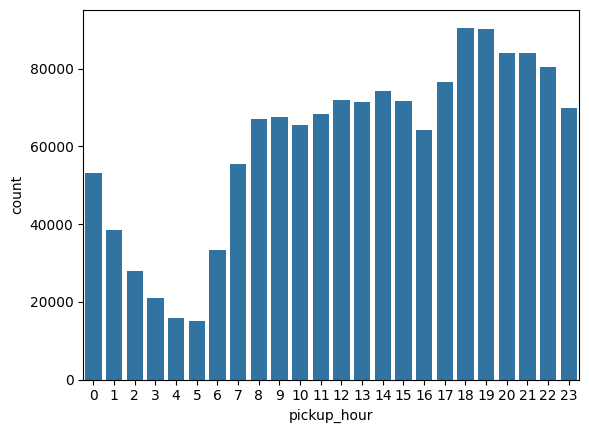

In [126]:
# rush hours for taxi pickups 
sns.countplot(data=taxi_df_new,x='pickup_hour')

plt.show()

__Things to note__
1. Cab pickups reduce after midnight and pickup pace after daybreak around 6am.
2. Pickups reach peak at 8am and then stabilize till 3pm.
3. Again the pickups gain strength around 6pm till 10pm at nigh

# Pickup  & Dropoff Latitude 

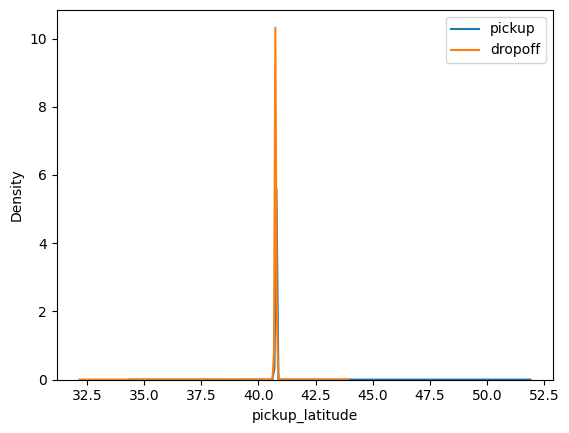

In [128]:
# distribution of the column 

sns.kdeplot(taxi_df_new['pickup_latitude'],label='pickup')
sns.kdeplot(taxi_df_new['dropoff_latitude'],label='dropoff')

plt.legend()
plt.show()

- There are a considerable outliers on both sides of the distribution


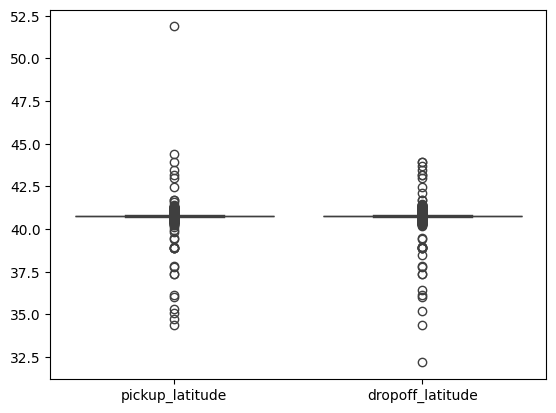

In [129]:
# plot boxplots
sns.boxplot(taxi_df_new[['pickup_latitude','dropoff_latitude']])

plt.show()

In [130]:
# get the min, max, median and mean values
taxi_df_new[['pickup_latitude','dropoff_latitude']].agg(['min','max','mean','median','std'])


,pickup_latitude,dropoff_latitude
min,34.359695,32.181141
max,51.881084,43.921028
mean,40.750921,40.751800
median,40.754101,40.754524
std,0.032881,0.035891


In [131]:
def compare_df_size(old_df,new_df):
    old_df_shape = old_df.shape
    new_df_shape = new_df.shape
    percentage_change = ((old_df_shape[0] - new_df_shape[0]) / old_df_shape[0]) * 100
    print(f'The shape of old dataframe is {old_df_shape}')
    print(f'The shape of new dataframe is {new_df_shape}')
    print(f'The difference of rows is {old_df_shape[0] - new_df_shape[0]}')
    print(f'The percentage of outliers removed are {percentage_change:.2f}')

In [132]:
# creating new dataframe without the outliers and then study the distribution
# outliers should be removed using the IQR approach

def remove_outliers(dataframe,column_names,fold=1.5):
    filtered_df = dataframe.copy()
    for column_name in column_names:
        Q1, Q3 = dataframe[column_name].quantile([0.25,0.75])
        IQR = Q3 - Q1
        upper_bound = Q3 + (fold*IQR)
        lower_bound = Q1 - (fold*IQR)
        filtered_df = filtered_df.loc[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound),:].copy()
    compare_df_size(old_df=dataframe,new_df=filtered_df)
    return filtered_df

In [133]:
df_without_outliers = remove_outliers(taxi_df_new,column_names=['pickup_latitude','dropoff_latitude',
                                                  'pickup_longitude','dropoff_longitude'],fold=3)

The shape of old dataframe is (1458644, 15)
The shape of new dataframe is (1341137, 15)
The difference of rows is 117507
The percentage of outliers removed are 8.06


In [134]:
# test the normality of columns
from scipy.stats import jarque_bera

def test_for_normality(data,column_name):
    alpha = 0.05
    _,p_val = jarque_bera(data[column_name].values)
    
    if p_val >= alpha:
        print(f'Fail to reject the H_0',f'The {column_name} is normally distributed')
    else:
        print(f'Reject the H_0',f'The {column_name} is  not normally distributed')

In [135]:
taxi_df_new.columns[4:8]

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [136]:
column_to_test_for_normality = taxi_df_new.columns[4:8]

for col in column_to_test_for_normality:
    test_for_normality(data=taxi_df_new,
                      column_name=col)
    print('*' * 100,end='\n')

Reject the H_0 The pickup_longitude is  not normally distributed
****************************************************************************************************
Reject the H_0 The pickup_latitude is  not normally distributed
****************************************************************************************************
Reject the H_0 The dropoff_longitude is  not normally distributed
****************************************************************************************************
Reject the H_0 The dropoff_latitude is  not normally distributed
****************************************************************************************************


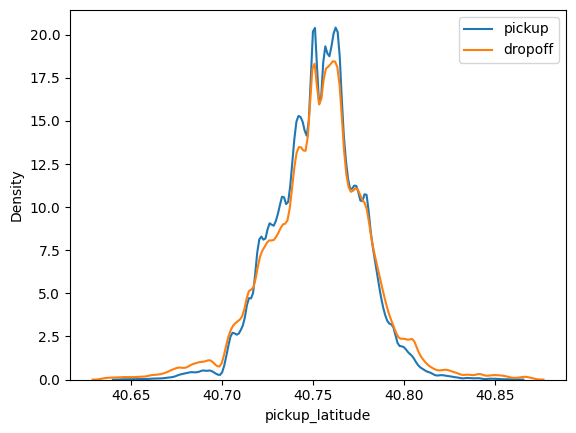

In [137]:
# distribution of the column

sns.kdeplot(df_without_outliers['pickup_latitude'],label='pickup')
sns.kdeplot(df_without_outliers['dropoff_latitude'],label='dropoff')
plt.legend()
plt.show()

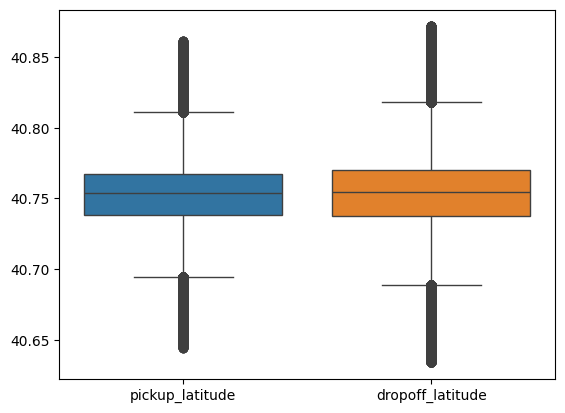

In [138]:
# plot boxplots

sns.boxplot(df_without_outliers[['pickup_latitude','dropoff_latitude']])
plt.show()

# Pickup and Dropoff Longitude

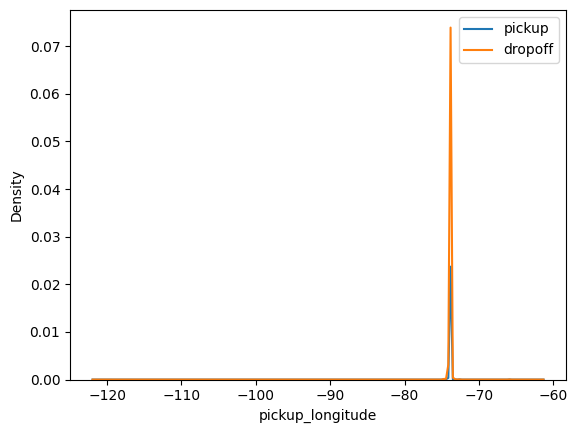

In [139]:
# distribution of the column

sns.kdeplot(taxi_df_new['pickup_longitude'],label='pickup')
sns.kdeplot(taxi_df_new['dropoff_longitude'],label='dropoff')
plt.legend()
plt.show()

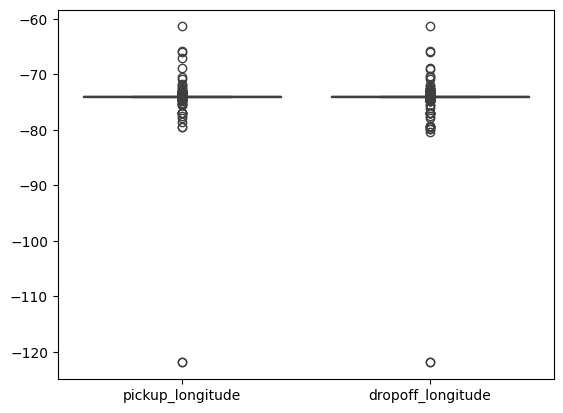

In [140]:
# plot boxplots

sns.boxplot(taxi_df_new[['pickup_longitude','dropoff_longitude']])
plt.show()

In [141]:

# get the min, max, median and mean values

taxi_df_new[['pickup_longitude','dropoff_longitude']].agg(['min','max','mean','median'])

,pickup_longitude,dropoff_longitude
min,-121.933342,-121.933304
max,-61.335529,-61.335529
mean,-73.973486,-73.973416
median,-73.981743,-73.979752


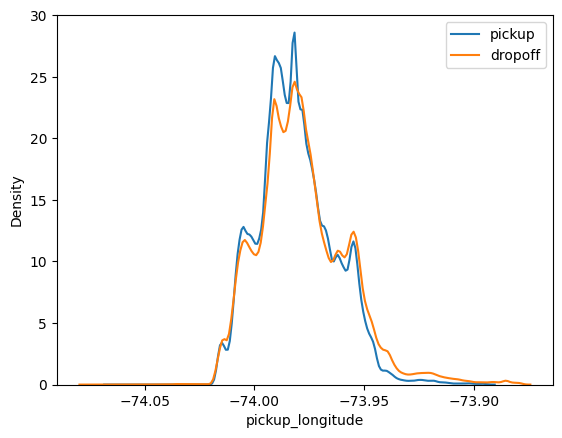

In [142]:
sns.kdeplot(df_without_outliers['pickup_longitude'],label='pickup')
sns.kdeplot(df_without_outliers['dropoff_longitude'],label='dropoff')
plt.legend()
plt.show()

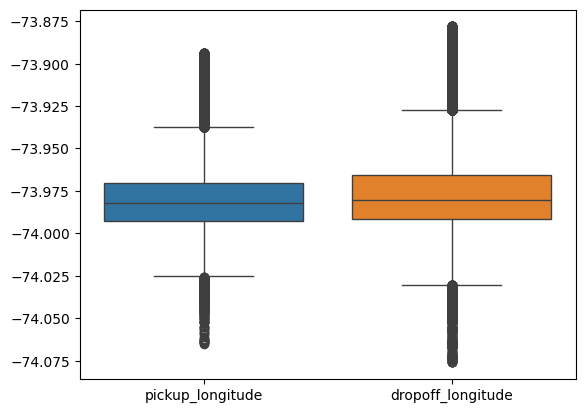

In [143]:
# plot boxplots

sns.boxplot(df_without_outliers[['pickup_longitude','dropoff_longitude']])
plt.show()

In [144]:
!pip install feature-engine


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.4 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/9.8 MB 1.8 MB/s eta 0:00:05
   ------ --------------------------------- 1.6/9.8 MB 2.1 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.8 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.8 MB 2.0 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.8 MB 2.0 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.8 MB 2.1 MB/s eta 0:00:04
   --------------- ------------------------ 3.9/9.8 MB 2.2 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.8 MB 2.2 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.8 MB 2.1 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.8 MB 2.0 MB/s eta 0:00:03
   -------------------- --

### Outlier Removal using Percentile approach 

In [146]:
def plot_boxplots(data,columns):
    div,rem = divmod(len(columns),2)
    number_of_rows = div+rem
    number_of_columns = 2
    for index,value in enumerate(columns):
        plt.subplot(number_of_rows,number_of_columns,index+1)
        sns.boxplot(data=data,y=value,whis=3)
        plt.tight_layout()
    plt.show()

In [147]:
def plot_kdeplots(data,columns):
    div, rem = divmod(len(columns),2)
    number_of_rows = div + rem
    number_of_columns = 2
    fig = plt.figure(figsize=(15,8))
    for ind,col in enumerate(columns):
        plt.subplot(number_of_rows,number_of_columns,ind+1)
        sns.kdeplot(data=data,x=col)
        plt.tight_layout()
    plt.show()

In [148]:
normal_durations_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,7.250000


In [149]:
normal_durations_df['trip_duration'].max()

np.float64(99.98333333333333)

In [150]:
df_subset = normal_durations_df.iloc[:,5:9]
df_subset

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.982155,40.767937,-73.964630,40.765602
1,-73.980415,40.738564,-73.999481,40.731152
2,-73.979027,40.763939,-74.005333,40.710087
3,-74.010040,40.719971,-74.012268,40.706718
4,-73.973053,40.793209,-73.972923,40.782520
...,...,...,...,...
1458639,-73.982201,40.745522,-73.994911,40.740170
1458640,-74.000946,40.747379,-73.970184,40.796547
1458641,-73.959129,40.768799,-74.004433,40.707371
1458642,-73.982079,40.749062,-73.974632,40.757107


In [151]:
latitude_columns = normal_durations_df.columns[normal_durations_df.columns.str.contains('latitude')]
longitude_columns = normal_durations_df.columns[normal_durations_df.columns.str.contains('longitude')]

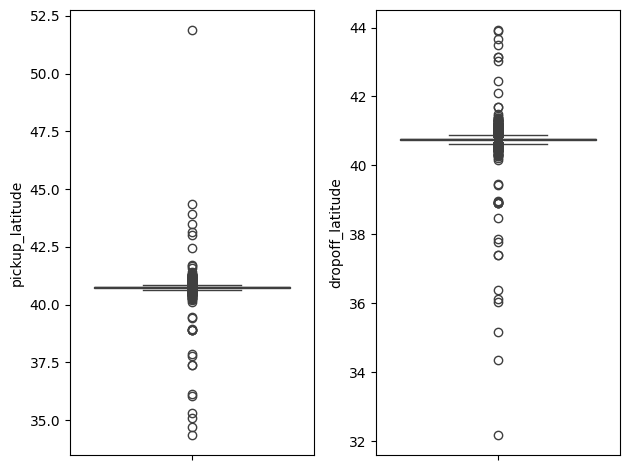

In [153]:
# boxplots for latitude columns

plot_boxplots(df_subset,latitude_columns)

In [154]:
normal_durations_df.loc[(df_subset['pickup_latitude'] > 50)]


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,13.2


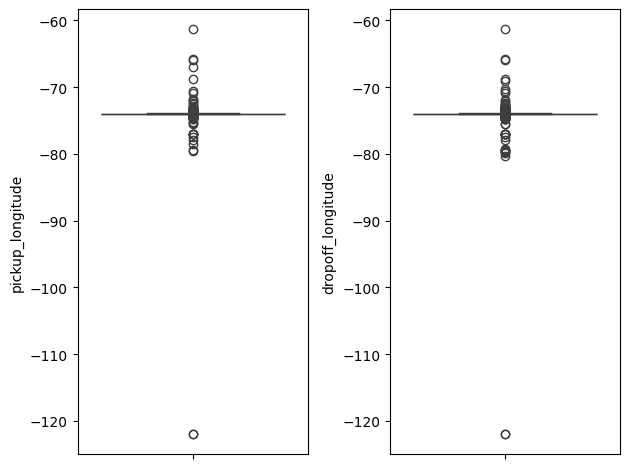

In [155]:
# boxplots for longitude columns

plot_boxplots(df_subset,longitude_columns)

In [156]:
remove_outliers(df_subset,df_subset.columns.to_list(),fold=1.5)


The shape of old dataframe is (1456077, 4)
The shape of new dataframe is (1265909, 4)
The difference of rows is 190168
The percentage of outliers removed are 13.06


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.982155,40.767937,-73.964630,40.765602
1,-73.980415,40.738564,-73.999481,40.731152
2,-73.979027,40.763939,-74.005333,40.710087
3,-74.010040,40.719971,-74.012268,40.706718
4,-73.973053,40.793209,-73.972923,40.782520
...,...,...,...,...
1458639,-73.982201,40.745522,-73.994911,40.740170
1458640,-74.000946,40.747379,-73.970184,40.796547
1458641,-73.959129,40.768799,-74.004433,40.707371
1458642,-73.982079,40.749062,-73.974632,40.757107


In [157]:
# 0.1 and 99.9 percentile values

df_subset.quantile([0.001,0.999])

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0.001,-74.017220,40.641510,-74.177605,40.604317
0.999,-73.776688,40.842444,-73.740190,40.889462


In [158]:
# statistical summary of trip durations without removal of outliers

summary_original = normal_durations_df['trip_duration'].agg(func=['min','max','median','mean'])
summary_original.name = 'before_removal'

summary_original

min        0.016667
max       99.983333
median    11.016667
mean      13.914414
Name: before_removal, dtype: float64

In [159]:
# distribution of passenger count before outlier removal

normal_durations_df['passenger_count'].value_counts()

passenger_count
1    1031963
2     209917
5      77849
3      59759
6      48190
4      28335
0         59
7          3
9          1
8          1
Name: count, dtype: int64

In [160]:
# data row where passenger count is greater than 6

normal_durations_df[normal_durations_df['passenger_count'] > 6]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
433304,id3280610,2,2016-06-07 10:06:24,2016-06-07 10:06:43,7,-74.173668,40.737274,-74.173660,40.737297,N,0.316667
436047,id2489742,2,2016-06-24 08:09:21,2016-06-24 08:18:41,9,-73.710632,40.671581,-73.710632,40.671581,N,9.333333
489613,id0506488,2,2016-05-08 22:39:08,2016-05-08 22:39:23,7,-74.039482,40.715031,-74.039482,40.715019,N,0.250000
824904,id0988237,2,2016-04-23 19:46:08,2016-04-23 19:46:33,7,-73.631149,40.768551,-73.631149,40.768551,N,0.416667
826064,id1488553,2,2016-01-01 01:15:20,2016-01-01 01:17:04,8,-73.992653,40.768719,-74.041374,40.729954,N,1.733333


In [161]:
from feature_engine.outliers import OutlierTrimmer
trimmer = OutlierTrimmer(capping_method='quantiles',tail='both',fold=0.001,variables=df_subset.columns.to_list())

# remove the outliers 
df_without_outliers = trimmer.fit_transform(normal_durations_df)

compare_df_size(normal_durations_df,df_without_outliers)

The shape of old dataframe is (1456077, 11)
The shape of new dataframe is (1445911, 11)
The difference of rows is 10166
The percentage of outliers removed are 0.70


In [162]:
trimmer.left_tail_caps_

{'pickup_longitude': -74.01721954345702,
 'pickup_latitude': 40.641510009765625,
 'dropoff_longitude': -74.17760467529298,
 'dropoff_latitude': 40.604316711425774}

In [163]:
trimmer.right_tail_caps_

{'pickup_longitude': -73.7766876220703,
 'pickup_latitude': 40.842444213867196,
 'dropoff_longitude': -73.74018975830077,
 'dropoff_latitude': 40.889461517333984}

In [164]:
# statistical summary of trip durations after removal of outliers

summary_after_removal = df_without_outliers['trip_duration'].agg(func=['min','max','median','mean'])
summary_after_removal.name = 'after_removal'
summary_after_removal

min        0.016667
max       99.983333
median    10.983333
mean      13.816252
Name: after_removal, dtype: float64

In [165]:
# merge the two results

pd.concat([summary_original,summary_after_removal],axis=1)

,before_removal,after_removal
min,0.016667,0.016667
max,99.983333,99.983333
median,11.016667,10.983333
mean,13.914414,13.816252


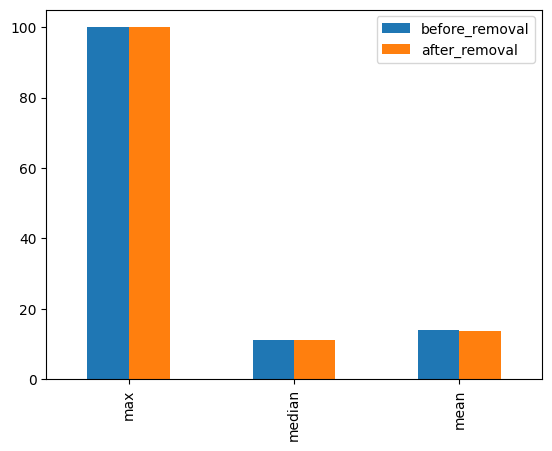

In [166]:
# plot the two results

pd.concat([summary_original,summary_after_removal],axis=1).iloc[1:,:].plot(kind='bar')
plt.show()

In [167]:
# distribution of passenger count after removal of outliers

df_without_outliers['passenger_count'].value_counts()

passenger_count
1    1024854
2     208322
5      77354
3      59329
6      47888
4      28111
0         52
8          1
Name: count, dtype: int64

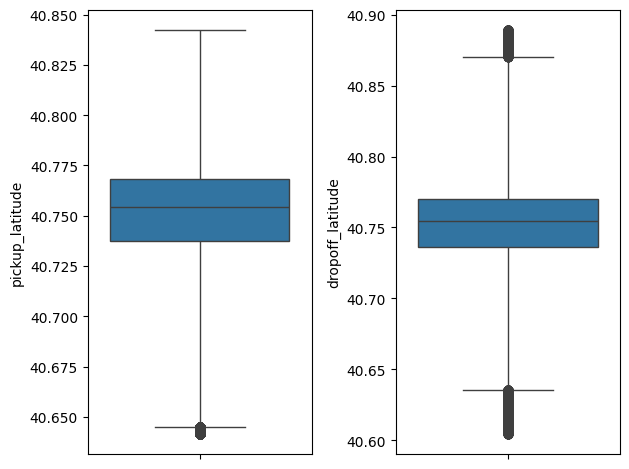

In [168]:
# boxplots for latitude columns

plot_boxplots(df_without_outliers,latitude_columns)

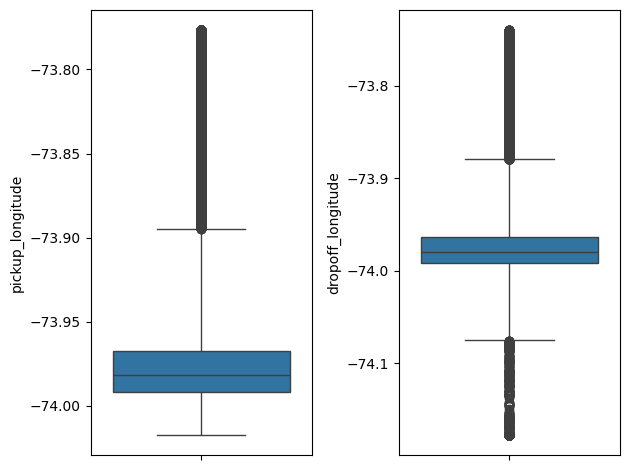

In [169]:
# boxplots for longitude columns

plot_boxplots(df_without_outliers,longitude_columns)

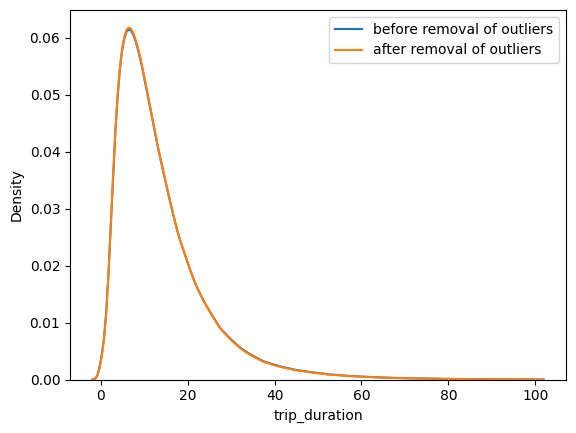

In [170]:
# distribution of the output column before and after removal of outliers

sns.kdeplot(data=normal_durations_df,x='trip_duration',label='before removal of outliers')

sns.kdeplot(data=df_without_outliers,x='trip_duration',label='after removal of outliers')
plt.legend()
plt.show()

In [171]:
from sklearn.preprocessing import PowerTransformer

In [172]:
df_without_outliers[df_subset.columns].agg(['min','max','mean','median'])


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
min,-74.017220,40.64151,-74.177605,40.604317
max,-73.776688,40.84243,-73.740204,40.889462
mean,-73.973902,40.75115,-73.973587,40.751921
median,-73.981789,40.75420,-73.979797,40.754593


In [173]:
df_without_outliers.loc[(df_without_outliers['pickup_latitude'] == df_without_outliers['pickup_latitude'].min()),:]


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
120228,id1906170,1,2016-01-09 22:32:08,2016-01-09 23:06:49,1,-73.788208,40.64151,-73.984116,40.720825,N,34.683333
188058,id3847366,1,2016-06-29 23:50:37,2016-06-30 00:23:20,1,-73.787994,40.64151,-73.987068,40.734283,N,32.716667
268188,id2939379,1,2016-06-18 20:56:17,2016-06-18 21:46:21,2,-73.787971,40.64151,-73.992371,40.756638,N,50.066667
357864,id2578987,1,2016-03-15 16:01:05,2016-03-15 16:46:21,1,-73.788368,40.64151,-73.957413,40.663593,N,45.266667
426572,id2520435,2,2016-04-05 17:49:51,2016-04-05 18:38:50,2,-73.788033,40.64151,-73.949181,40.784538,N,48.983333
483217,id1733131,1,2016-05-05 11:09:42,2016-05-05 11:59:42,2,-73.788010,40.64151,-73.979431,40.754852,Y,50.000000
485990,id2022839,1,2016-01-18 22:25:49,2016-01-18 22:58:11,2,-73.788132,40.64151,-73.993500,40.752308,N,32.366667
544976,id0803570,2,2016-01-12 23:18:04,2016-01-12 23:55:29,1,-73.788353,40.64151,-73.823143,40.863480,N,37.416667
770965,id1141844,1,2016-06-24 19:06:10,2016-06-24 19:52:04,1,-73.788666,40.64151,-73.936852,40.705795,N,45.900000
791962,id2792108,2,2016-03-13 18:30:17,2016-03-13 19:09:14,1,-73.788002,40.64151,-73.952057,40.717751,N,38.950000


In [176]:
# save the data 
df_without_outliers.to_csv('../data/processed/final_data.csv')

In [177]:
# load the data
final_df = df_without_outliers.copy()


In [178]:
final_df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,7.250000


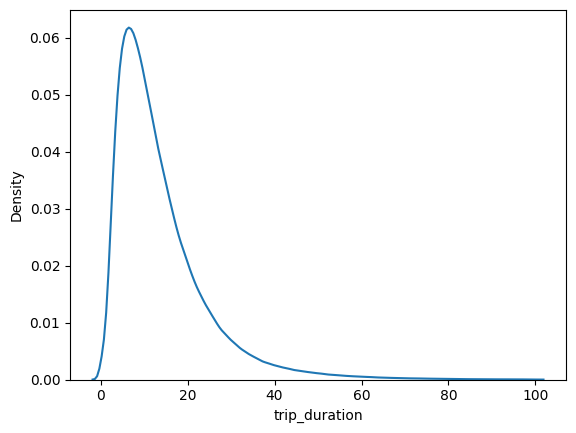

In [179]:
# kdeplot for the target column

sns.kdeplot(data=final_df,x='trip_duration')
plt.show()

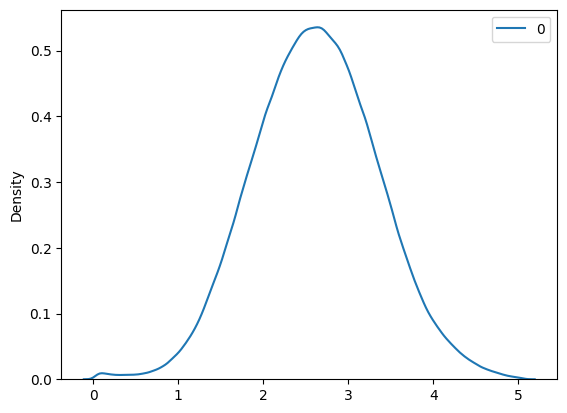

In [180]:
# apply yeo-johnson transformation

from sklearn.preprocessing import PowerTransformer

pt_target = PowerTransformer(standardize=False)

# transform the output column

trip_duration_trans = pt_target.fit_transform(final_df[['trip_duration']])

sns.kdeplot(trip_duration_trans)
plt.show()

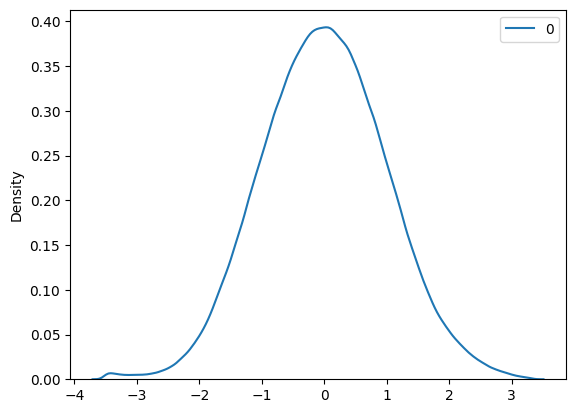

In [181]:
# apply yeo-johnson transformation

from sklearn.preprocessing import PowerTransformer

pt_target = PowerTransformer(standardize=True)

# transform the output column

trip_duration_trans = pt_target.fit_transform(final_df[['trip_duration']])

sns.kdeplot(trip_duration_trans)
plt.show()

In [182]:
pd.DataFrame(trip_duration_trans,columns=['target']).skew()


target    0.000407
dtype: float64

In [183]:
np.mean(trip_duration_trans),np.std(trip_duration_trans)


(np.float64(-7.24842428526725e-16), np.float64(1.0))

# Passenger Count 

In [184]:

# value counts in data

final_df['passenger_count'].value_counts()

passenger_count
1    1024854
2     208322
5      77354
3      59329
6      47888
4      28111
0         52
8          1
Name: count, dtype: int64

In [185]:
# impact of 0 passengers in data

final_df.loc[final_df['passenger_count'] == 0,'trip_duration'].agg(func=['min','max','median','mean','std'])

min        0.016667
max       54.050000
median     0.366667
mean       4.775962
std       10.968956
Name: trip_duration, dtype: float64

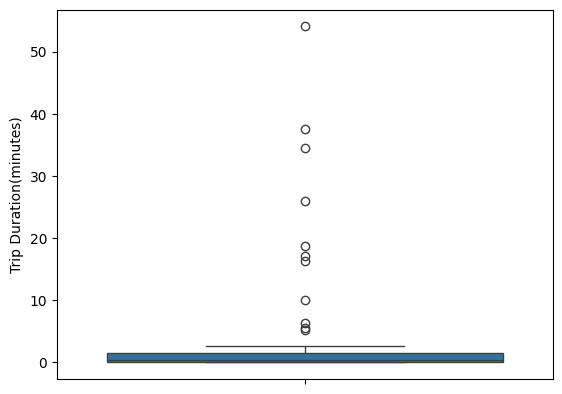

In [186]:
# boxplot

sns.boxplot(final_df.loc[(final_df['passenger_count'] == 0),'trip_duration'].reset_index(drop=True))
plt.ylabel('Trip Duration(minutes)')
plt.show()

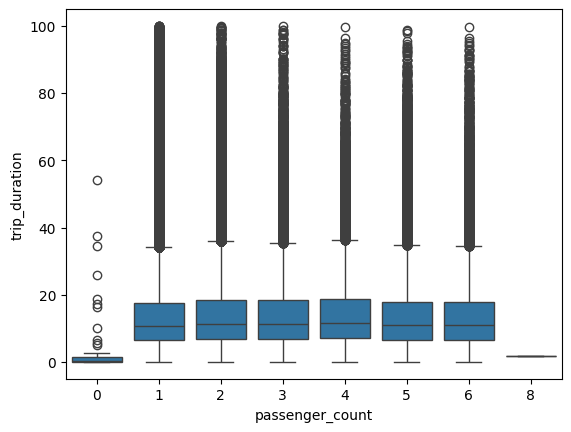

In [187]:
# plot for all passengers

sns.boxplot(data=final_df,x='passenger_count',y='trip_duration')
plt.show()

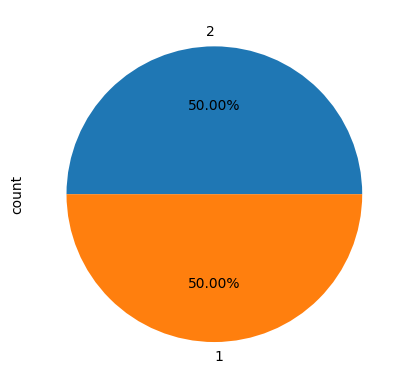

In [188]:
# vendor distribution for 0 passengers 

final_df.loc[(final_df['passenger_count'] == 0),'vendor_id'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

In [190]:
# hypothesis test for impact of passenger count on trip duration

from scipy.stats import f_oneway, levene

# test for homoscedasticity or similar variances

arr_count_1 = final_df.loc[(final_df['passenger_count'] == 1),'trip_duration'].values
arr_count_2 = final_df.loc[(final_df['passenger_count'] == 2),'trip_duration'].values
arr_count_3 = final_df.loc[(final_df['passenger_count'] == 3),'trip_duration'].values
arr_count_4 = final_df.loc[(final_df['passenger_count'] == 4),'trip_duration'].values
arr_count_5 = final_df.loc[(final_df['passenger_count'] == 5),'trip_duration'].values
arr_count_6 = final_df.loc[(final_df['passenger_count'] == 6),'trip_duration'].values

leven_stat,levene_p_val = levene(arr_count_1,arr_count_2,arr_count_3,arr_count_4,arr_count_5,arr_count_6)

alpha = 0.05

print(levene_p_val)

if levene_p_val > alpha:
    print('Fail to reject the H_0, The variance of samples are similar')
else:
    print('Reject the H_0,the variances are different')

1.9077030618275664e-134
Reject the H_0,the variances are different


In [191]:
# std of trip duration based on passenger count

final_df.groupby('passenger_count')['trip_duration'].std()

passenger_count
0    10.968956
1    10.507430
2    11.271044
3    10.892414
4    11.354504
5    10.710875
6    10.713153
8          NaN
Name: trip_duration, dtype: float64

In [192]:
# shape of data before removal

final_df.shape[0]

1445911

In [193]:
# remove the rows of data where passenger count is 8

final_df = final_df.drop(index=final_df[final_df['passenger_count'] == 8].index)

final_df.shape

(1445910, 11)

In [194]:
# unique values in the passenger count column

np.sort(final_df['passenger_count'].unique())

array([0, 1, 2, 3, 4, 5, 6])

## Store and FWD flag of column 

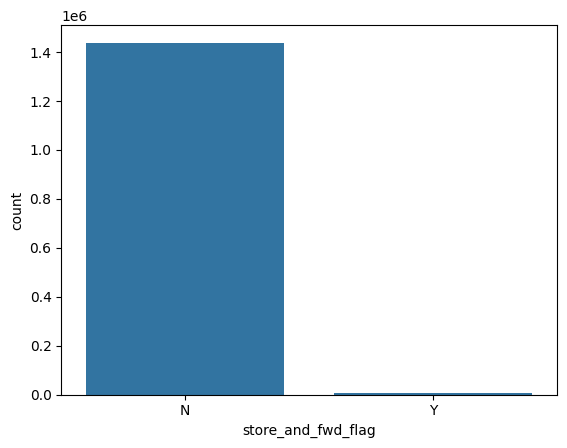

In [195]:
# distribution of column

sns.countplot(data=final_df,x='store_and_fwd_flag')
plt.show()

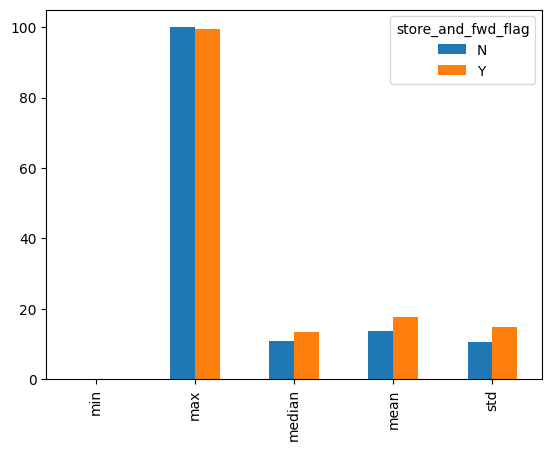

In [196]:
# statistical summary related to target

final_df.groupby('store_and_fwd_flag')['trip_duration'].agg(func=['min','max','median','mean','std']).T.plot(kind='bar')
plt.show()

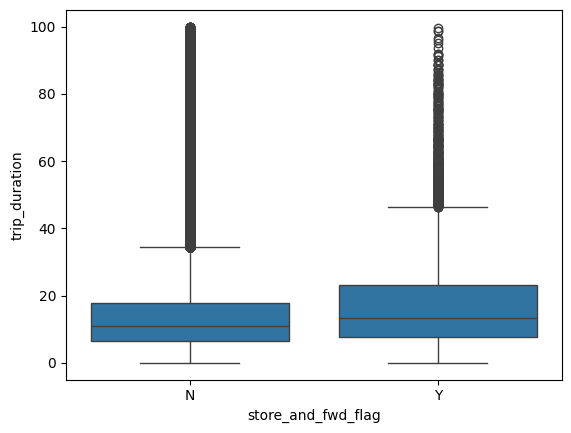

In [197]:
# plot boxplots

sns.boxplot(data=final_df,x='store_and_fwd_flag',y='trip_duration')
plt.show()

In [198]:
# percentage distribution

final_df['store_and_fwd_flag'].value_counts(normalize=True) * 100

store_and_fwd_flag
N    99.449897
Y     0.550103
Name: proportion, dtype: float64